In [81]:
import numpy as np 
import pandas as pd

# for pdf manipulation
import camelot 
import ocrmypdf
import PyPDF2
import pdf2image
import pytesseract
import tabula
import textract

from datetime import datetime
from IPython.display import IFrame, HTML, display

In [159]:
# pdfs that are searchable documents -- the good 
searchable_pdf_amort_file = 'data/pdf_data/exhibita-10-20-2018.pdf'
searchable_pdf_amort_page4_file =  'page4-10-15-2018.pdf'
searchable_pdf_rotated_file = 'data/pdf_data/camelot-twisted.pdf'
searchable_pdf_license_file = 'data/pdf_data/active_licenses.pdf'
searchable_pdf_fuel_file = 'data/pdf_data/camelot-example.pdf'

# scanned pdf documents with no acessible elements -- the bad
file = 'data/pdf_data/Final Exhibit A to Equipment Lease #29.pdf'
scanned_pdf_amort_file = 'data/pdf_data/Final Exhibit A to Equipment Lease #29.pdf'
scanned_pdf_epa_file = 'data/pdf_data/epa-letter.pdf'

# png files -- the ugly
png_amort_page4_image_file = 'data/img_data/page4-10-17-2018-pdf2image.png'
png_license_page2_image_file = 'data/img_data/active-license-page2-10-18-2018.png'
png_epa_image_file = 'data/img_data/epa-letter.png' 

## <font color=purple>working with textract</font>

### <font color=green>summary</font>
1. the [documentation](https://textract.readthedocs.io/en/stable/)
2. Appears optimized for raw text and ocr process not table dectection or document feature inspection. 
3. Describes its value proposition as bringing together abilities under a single package for extracting text or 'dark data' from any file type: 


[.csv, .doc, .docx, .gif, .jpg, .jpeg, .html, .pdf, .txt, .xlsx, .wav] etc...

**textract handles searchable pdfs**

In [83]:
textract.process(searchable_pdf_rotated_file)

b'6453\n\n5844\n\n5161\n\n4403\n\nKarnataka\n\nAndhra Pradesh\n\nMaharashtra\n\nGujarat\n\nNNMB\n\n* Data not available\n\n38742\n\n*\n\nUttar Pradesh\n\nPooled\n\n*\n\n3756\n\nWest Bengal\n\nOrissa\n\n*\n\n7387\n\nTamil Nadu\n\nMadhya Pradesh\n\n5738\n\n1975-79\n\nKerala\n\nState\n\n53618\n\n*\n\n*\n\n5540\n\n*\n\n5374\n\n7796\n\n9920\n\n8138\n\n10217\n\n6633\n\n1988-90\n\n60601\n\n*\n\n*\n\n12024\n\n*\n\n4866\n\n6883\n\n9545\n\n12606\n\n5813\n\n8864\n\n1996-97\n\n(No. of individuals)\n\n86898\n\n9860\n\n8047\n\n8473\n\n7942\n\n9645\n\n9525\n\n8300\n\n8958\n\n7851\n\n8297\n\n2011-12\n\nNutritional Assessment\n\n72\n\n4459\n\n581\n\n423\n\n398\n\n470\n\n477\n\n467\n\n557\n\n428\n\n413\n\n245\n\nIYCF Practices\n(No. of mothers:\n2011-12)\n\n21918\n\n2139\n\n2058\n\n2040\n\n1965\n\n2687\n\n2368\n\n1899\n\n2467\n\n2134\n\n2161\n\nMen\n\n14312\n\n1185\n\n1413\n\n1093\n\n1579\n\n2122\n\n1417\n\n1111\n\n1628\n\n1119\n\n1645\n\nMen\n\n18519\n\n1366\n\n2027\n\n1628\n\n1709\n\n2503\n\n1599\n\n1

In [84]:
# tesseract method on textract doesn't auto handle rotated pages but pdftotext method does
textract.process(searchable_pdf_rotated_file, extension='pdf', method='tesseract')

b'$.23 323 53mm 95.55\xe2\x80\x9d.\n\ng\n\nm_Ezz\n\nm_nm__m>m 8: \xc2\xa33 \xc2\xab\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n2m: \xc2\xab:2: :58 22m mm: 83a :58 28m \xc2\xabE: 3.8;\n89 mm : m SN mm a 5m 88 . . . \xef\xac\x81gs\xe2\x80\x9c. :25\n88 m 2: SR $8 MN? 28 . . . E?mm mm;\n89 $9 \xc2\xabmom 88 man 3% \xc2\xab83 8mm 83 $26\n85 39 Ba 82 03 $3 . . . 5885 SEE:\n88 mm a a8 38 EV $8 8? \xef\xac\x81mm 83 Emgo\nmm? m 2: $8 $8 \xe2\x80\x9c3 mmmm ammo 8R 6 B ezmemcms.\nmm? C: 3% $2 Em 8mm 3mm ommm 3% cmmumi 8:22\nwmom mum: gum $\xc2\xa2N mm,\xe2\x80\x9c wmmw 083 mm 5 Ea 2%me\nmm: m P C wmwm cm a m; 5% m 5m CNS ~me :32 E3\n5% $9 mm 5 5 a ma 3% comm mmoo w\xef\xac\x81m m_emx\n\n5:53 55. 5:53 5:. ANEEN \xc2\xab3:; 3.82 8.82 2.32\n\nR 7\xe2\x80\x94 SN 3 \xe2\x80\x94. \xe2\x80\x94 SN \xe2\x80\x9dm.\xef\xac\x81\xef\xac\x81oE B .05 Am_m:u_>_u:_ ,6 65 33m\nEsau B .on :35 B .on \xe2\x80\x9d8:35 "G:\n\n39.5 uooE 95mm\xe2\x80\x9c.\n\n \n

In [85]:
textract.process(searchable_pdf_rotated_file, extension='pdf', method='pdftotext' )

b'6453\n\n5844\n\n5161\n\n4403\n\nKarnataka\n\nAndhra Pradesh\n\nMaharashtra\n\nGujarat\n\nNNMB\n\n* Data not available\n\n38742\n\n*\n\nUttar Pradesh\n\nPooled\n\n*\n\n3756\n\nWest Bengal\n\nOrissa\n\n*\n\n7387\n\nTamil Nadu\n\nMadhya Pradesh\n\n5738\n\n1975-79\n\nKerala\n\nState\n\n53618\n\n*\n\n*\n\n5540\n\n*\n\n5374\n\n7796\n\n9920\n\n8138\n\n10217\n\n6633\n\n1988-90\n\n60601\n\n*\n\n*\n\n12024\n\n*\n\n4866\n\n6883\n\n9545\n\n12606\n\n5813\n\n8864\n\n1996-97\n\n(No. of individuals)\n\n86898\n\n9860\n\n8047\n\n8473\n\n7942\n\n9645\n\n9525\n\n8300\n\n8958\n\n7851\n\n8297\n\n2011-12\n\nNutritional Assessment\n\n72\n\n4459\n\n581\n\n423\n\n398\n\n470\n\n477\n\n467\n\n557\n\n428\n\n413\n\n245\n\nIYCF Practices\n(No. of mothers:\n2011-12)\n\n21918\n\n2139\n\n2058\n\n2040\n\n1965\n\n2687\n\n2368\n\n1899\n\n2467\n\n2134\n\n2161\n\nMen\n\n14312\n\n1185\n\n1413\n\n1093\n\n1579\n\n2122\n\n1417\n\n1111\n\n1628\n\n1119\n\n1645\n\nMen\n\n18519\n\n1366\n\n2027\n\n1628\n\n1709\n\n2503\n\n1599\n\n1

In [86]:
# parse multipage searchable pdf
textract.process(searchable_pdf_license_file).decode()

"ALPHABETIC LISTING BY TYPE\nOF ACTIVE LICENSES\nOKLAHOMA ABLE COMMISSION\n\nFEBRUARY 2014 M27 (BUS)\n\nLICENSE\nNUMBER TYPE DBA NAME\n648765 AAA ALLEGIANT AIR\n\nLICENSEE NAME\nALLEGIANT AIR LLC\n\n648766 AAA\n82030 AAA\n\nALLEGIANT AIR\nAMERICAN AIRLINES\n\nALLEGIANT AIR LLC\nAMERICAN AIRLINES INC\n\n509462 AAA\n\nAMERICAN AIRLINES\n\n509609 AAA\n\nAMERICAN EAGLE\n\n402986 AAA\n\nAMERICAN EAGLE\n\nAMERICAN AIRLINES INC\nAMERICAN EAGLE\nAIRLINES INC\nAMERICAN EAGLE\nAIRLINES INC\n\n79145 AAA\n600941 AAA\n\nDELTA AIR LINES\nENDEAVOR AIR\n\n478482 AAA\n505981 AAA\n\nEXPRESSJET AIRLINES\nSKYWEST AIRLINES\n\n429754 AAA\n\nSOUTHWEST AIRLINES\nTULSA INTERNATIONAL\nAIRPORT\n\n429755 AAA\n\nUNITED AIRLINES\nUNITED AIRLINES\nA SENSU JAPANESE\n625422 BAW RESTAURANT\nADAMO'S ROUTE 66\n464828 BAW ITALIAN VILLA\n415051 AAA\n106719 AAA\n\n184066 BAW AJANTA\n547693 BAW AMERICINN OF SAYRE\nANDOLINI'S PIZZERIA &\n428377 BAW ITALIAN RESTAURANT\nASAHI JAPANESE\n446957 BAW RESTAURANT\n632501 BAW BACK DOO

In [87]:
!ls 

10-11-2018-brl1906-exploring-pdf2dataframe-scrapers.ipynb
10-13-2018-brl1906-virtualenv-information.ipynb
10-15-2018-brl1906-working-with-camelot.ipynb
10-16-2018-brl1906-working-with-pytesseract.ipynb
10-16-2018-brl1906-working-with-tabula-py.ipynb
10-17-2018-brl1906-working-with-pdf2image.ipynb
10-18-2018-brl1906-working-with-textract.ipynb
data
images
page4-10-14-2018.pdf
page4-10-15-2018.pdf
page4-10-19-2018.pdf
page4-10-20-2018.pdf
page4-10-21-2018.pdf
requirements.txt
venv_final


**textract hanldes scanned documents and image files**

In [88]:
textract.process(png_amort_page4_image_file, method='tesseract').decode()

'Payment Payment\n\nNo. Date\nLoan 11/9/2017\n1 5/1/2018\n2 1 1/1/2018\n3 5/1/2019\n4 11/1/2019\n5 5/1/2020\n6 11/1/2020\n7 5/ 1/ 202 1\n8 11/ 1/ 2021\n9 5/1/2022\n10 11/1/2022\n11 5/1/2023\n12 1 1/ 1/ 2023\n13 5/1/2024\n14 11/1/2024\n15 5/ 1/ 2025\n16 1 1/ 1/ 2025\n17 5/1/2026\n18 11/ 1/ 2026\n19 5/1/2027\n20 11/ 1/ 2027\nTotals\n\nUntil Lessee receives written notiﬁcation to the contrary, all payments due under\nthe Master Lease and this Schedule A No. 29, including but not limited to Rental\nPayments, Additional Rents, indemniﬁcations and other sums due and payable\nunder the Lease are to be paid to and all notices are to be sent to the following\n\nAMORTIZATION SCHEDULE\n\nPayment\nAmount\n\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n22,005,290.80\n

In [89]:
# processing image file
for line in textract.process(png_license_page2_image_file).decode().split():
    print(line)
    

FEBRUARY
2014
M27
(BUS)
LICENSE
NUMBER
TYPE
632426
BAW
641387
BAW
238892
BAW
288037
BAW
373340
BAW
443590
BAW
406487
BAW
487016
BAW
617276
BAW
603771
BAW
603772
BAW
603773
BAW
603770
BAW
643433
BAW
561218
BAW
635527
BAW
623823
BAW
633246
BAW
549471
BAW
614377
BAW
632300
BAW
507875
BAW
604941
BAW
DBA
NAME
BELLAROMA
LLC
BLUE
BELLE
SALOON
BOSTON
DELI
&
GRILL
CAFFE
PRANZO
CASA
SAN
MARCOS
CEDAR
ROCK
INN
CHEFS
DI
DOMANI
CLASSIC
CIGAR
LOUNGE
COFFEE
CUP
COOLGREENS
COOLGREENS
COOLGREENS
COOLGREENS
COW
CREEK
CAFE
DAVINCI'S
ITALIAN
RESTAURANT
DIARTI
ITALIAN
CAFE
DOMENICA
ITALIA
KITCHEN
ELEMENTS
ART
GALLERY
FAT
GUY'S
BURGER
JOINT
FAT
GUY'S
BURGER
JOINT
FONTANA
ITALIAN
RESTAURANT
FRATELI'S
LICENSEE
NAME
BELLAROMA
LLC
BLUE
BELLE
ENTERTAINMENT
LLC
BOSTON
DELI
&
GRILL
INC
MAZEL
TOV
INC
MORA
ENTERPRISES
INC
CEDAR
ROCK
INN
LLC
ENGARD
INC
INFORMAL
PARTNERSHIP
COFFEE
CUP
LLC
COOLGREENS
BEER
AND
WINE
LLC
COOLGREENS
BEER
AND
WINE
LLC
COOLGREENS
BEER
AND
WINE
LLC
COOLGREENS
BEER
AND
WINE
LLC
OEME
LLC
NAPOLI'

In [90]:
# handles the entire file and returns whole file object as bytes, not just individual pages
textract.process(scanned_pdf_epa_file, extension='pdf', method='tesseract').decode()

'1; UNITED STATES ENVIRONMENTAL PROTECTION AGENCY\ng WASHINGTON DC 20460\n?\n\nSAMPLE LETTER\n\n \n\n1‘ in THE ADMINISTRATOR\n\nDear Governor:\n\nThere is no higher priority for the US Environmental Protection Agency (EPA) than protecting public\nhealth and ensuring the safety of our nation’s drinking water. Under the Safe Drinking Water Act\n(SDWA), «State» and most other states have the primary responsibility for the implementation and\nenforcement of drinking water regulations, while EPA is tasked with oversight of state efforts Recent\nevents in Flint, Michigan and other US. cities, have led to important discussions about the safety of our\nnation’s drinking water supplies, which is why I am writing to you today.\n\nI am asking you tojoin me in taking action to strengthen protection ofour nation’s drinking water,\nwhich is a shared responsibility involving state, tribal, local and federal governments. system owners\nand operators, consumers and other stakeholders. We must work toge

In [91]:
# using textract without parsing options on the table returns everything
# and is not parsed and constructed on a row or column basis so , 
# a manual examination for unpacking would be required if working with table
textract.process(searchable_pdf_amort_page4_file).decode()

'AMORTIZATION SCHEDULE\nPayment\n\nPayment\n\nPayment\n\nInterest\n\nPrincipal\n\nPurchase\n\nNo.\n\nDate\n\nAmount\n\nComponent\n\nComponent\n\nPrice\n\nLoan\n1\n2\n\n11/9/2017\n5/1/2018\n11/1/2018\n\n1,100,264.54\n1,100,264.54\n\n273,262.18\n271,872.65\n\n827,002.36\n828,391.89\n\n18,606,566.47\n17,753,322.82\n\n3\n4\n5\n\n5/1/2019\n11/1/2019\n5/1/2020\n\n1,100,264.54\n1,100,264.54\n1,100,264.54\n\n259,405.35\n246,750.42\n233,905.03\n\n840,859.19\n853,514.12\n866,359.51\n\n16,887,237.86\n16,008,118.31\n15,115,768.02\n\n6\n7\n\n11/1/2020\n5/1/2021\n\n1,100,264.54\n1,100,264.54\n\n220,866.32\n207,631.38\n\n879,398.22\n892,633.16\n\n14,209,987.85\n13,290,575.70\n\n8\n9\n\n11/1/2021\n5/1/2022\n\n1,100,264.54\n1,100,264.54\n\n194,197.25\n180,560.93\n\n906,067.29\n919,703.61\n\n12,357,326.39\n11,410,031.67\n\n10\n11\n\n11/1/2022\n5/1/2023\n\n1,100,264.54\n1,100,264.54\n\n166,719.39\n152,669.54\n\n933,545.15\n947,595.00\n\n10,448,480.17\n9,472,457.32\n\n12\n\n11/1/2023\n\n1,100,264.54\n\n13

In [92]:
# doesn't work well with this sort of table that is part of a larger text page
# underlying parsing algorighm seems to rely on guestimations on percieved column chunking 
textract.process(searchable_pdf_amort_page4_file, extension='pdf', method='tesseract').decode()

'Payment Payment\n\nNo. Date\n\nLoan 11/9/2017\n1 5/1/2018\n2 11/1/2018\n3 5/1/2019\n4 11/1/2019\n5 5/1/2020\n6 11/1/2020\n7 5/1/2021\n8 11/1/2021\n9 5/1/2022\n10 11/1/2022\n11 5/1/2023\n12 11/1/2023\n13 5/1/2024\n14 11/1/2024\n15 5/1/2025\n16 11/1/2025\n17 5/1/2026\n18 11/1/2026\n19 5/1/2027\n20 11/1/2027\n\nTotals\n\nUntil Lessee receives written notiﬁcation to the contrary, all payments due under\nthe Master Lease and this Schedule A No. 29, including but not limited to Rental\nPayments, Additional Rents, indemniﬁcations and other sums due and payable\nunder the Lease are to be paid to and all notices are to be sent to the following\n\nAMORTIZATION SCHEDULE\n\nPayment\nAmount\n\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n\n22,005,290.80\n\nrespective

**The process function has a 'method' parameter that when passed 'pdftotext' seems to perform better in instances where a space separated table is not bound by lines and is embeded within the greater text of a page**  ```textract.process(..... method='pdftotext')```

In [93]:
# doesn't work well with this sort of table that is part of a larger text page
textract.process(searchable_pdf_amort_page4_file, extension='pdf', method='pdftotext').decode()

'AMORTIZATION SCHEDULE\nPayment\n\nPayment\n\nPayment\n\nInterest\n\nPrincipal\n\nPurchase\n\nNo.\n\nDate\n\nAmount\n\nComponent\n\nComponent\n\nPrice\n\nLoan\n1\n2\n\n11/9/2017\n5/1/2018\n11/1/2018\n\n1,100,264.54\n1,100,264.54\n\n273,262.18\n271,872.65\n\n827,002.36\n828,391.89\n\n18,606,566.47\n17,753,322.82\n\n3\n4\n5\n\n5/1/2019\n11/1/2019\n5/1/2020\n\n1,100,264.54\n1,100,264.54\n1,100,264.54\n\n259,405.35\n246,750.42\n233,905.03\n\n840,859.19\n853,514.12\n866,359.51\n\n16,887,237.86\n16,008,118.31\n15,115,768.02\n\n6\n7\n\n11/1/2020\n5/1/2021\n\n1,100,264.54\n1,100,264.54\n\n220,866.32\n207,631.38\n\n879,398.22\n892,633.16\n\n14,209,987.85\n13,290,575.70\n\n8\n9\n\n11/1/2021\n5/1/2022\n\n1,100,264.54\n1,100,264.54\n\n194,197.25\n180,560.93\n\n906,067.29\n919,703.61\n\n12,357,326.39\n11,410,031.67\n\n10\n11\n\n11/1/2022\n5/1/2023\n\n1,100,264.54\n1,100,264.54\n\n166,719.39\n152,669.54\n\n933,545.15\n947,595.00\n\n10,448,480.17\n9,472,457.32\n\n12\n\n11/1/2023\n\n1,100,264.54\n\n13

<font><b>A line by line inspection of the return from the </b>```method='pdftotext'```<b> matches how <font color=purple>ocrmypdf</font> returns a scanned pdf</b></font>

In [94]:
# the pdftotext method is better for this case but not best still for handling 
# these types of tables because while it doesn't 'column chunk', it parses
# in horizontal blocks across perceived rows and 'cell sizes' to construct rows
textract.process(searchable_pdf_amort_page4_file, extension='pdf', method='pdftotext').decode().split()

['AMORTIZATION',
 'SCHEDULE',
 'Payment',
 'Payment',
 'Payment',
 'Interest',
 'Principal',
 'Purchase',
 'No.',
 'Date',
 'Amount',
 'Component',
 'Component',
 'Price',
 'Loan',
 '1',
 '2',
 '11/9/2017',
 '5/1/2018',
 '11/1/2018',
 '1,100,264.54',
 '1,100,264.54',
 '273,262.18',
 '271,872.65',
 '827,002.36',
 '828,391.89',
 '18,606,566.47',
 '17,753,322.82',
 '3',
 '4',
 '5',
 '5/1/2019',
 '11/1/2019',
 '5/1/2020',
 '1,100,264.54',
 '1,100,264.54',
 '1,100,264.54',
 '259,405.35',
 '246,750.42',
 '233,905.03',
 '840,859.19',
 '853,514.12',
 '866,359.51',
 '16,887,237.86',
 '16,008,118.31',
 '15,115,768.02',
 '6',
 '7',
 '11/1/2020',
 '5/1/2021',
 '1,100,264.54',
 '1,100,264.54',
 '220,866.32',
 '207,631.38',
 '879,398.22',
 '892,633.16',
 '14,209,987.85',
 '13,290,575.70',
 '8',
 '9',
 '11/1/2021',
 '5/1/2022',
 '1,100,264.54',
 '1,100,264.54',
 '194,197.25',
 '180,560.93',
 '906,067.29',
 '919,703.61',
 '12,357,326.39',
 '11,410,031.67',
 '10',
 '11',
 '11/1/2022',
 '5/1/2023',
 '1,

### <font color=orange>fairy dust:  textract</font>

1. Using options pdf & tesseract method return good results when the PDF is just text and not a table.  Seems optimized for raw text documents. 
2. It can procss and return entire documents as objects instead of creating separate page objects that need to be stored or managed as separate variables
3. Because textract handles a wide range of file formats, documents don't require pre-processing to convert across filetypes. Depending on the usecase, need and project scale, this means potentially eliminating steps in the workflow

In [95]:
# using the pdf extension and tesseract options handles text only (no tables) very well
textract.process(scanned_pdf_epa_file, extension='pdf', method='tesseract').decode()

'1; UNITED STATES ENVIRONMENTAL PROTECTION AGENCY\ng WASHINGTON DC 20460\n?\n\nSAMPLE LETTER\n\n \n\n1‘ in THE ADMINISTRATOR\n\nDear Governor:\n\nThere is no higher priority for the US Environmental Protection Agency (EPA) than protecting public\nhealth and ensuring the safety of our nation’s drinking water. Under the Safe Drinking Water Act\n(SDWA), «State» and most other states have the primary responsibility for the implementation and\nenforcement of drinking water regulations, while EPA is tasked with oversight of state efforts Recent\nevents in Flint, Michigan and other US. cities, have led to important discussions about the safety of our\nnation’s drinking water supplies, which is why I am writing to you today.\n\nI am asking you tojoin me in taking action to strengthen protection ofour nation’s drinking water,\nwhich is a shared responsibility involving state, tribal, local and federal governments. system owners\nand operators, consumers and other stakeholders. We must work toge

<font color=red><b>5-6 minute function execution</b></font>

In [96]:
import time
start = time.time()
amort_document_text = textract.process(file, method='tesseract')
end = time.time()
print('execution time: {} minutes'.format((end - start)/60))

execution time: 5.66107003291448 minutes


In [97]:
amort_document_text.decode()

'INDEX\n\nAMENDED AND RESTATED MASTER EQUIPMENT LEASE/PURCHASE\n\nAGREEMENT By and Between FIRST MUNICIPAL CREDIT CORPORATION,\nas Lessor and MAYOR AND CITY COUNCIL OF BALTIMORE, as Lessee Dated\n\nas of MARCH 17, 2004\n\nExhibit A Schedule A No. 29\n\nAttachment A Fon\'n of Lassee’s Acceptance Certiﬁcate\nAttachment B Form of Essential Use Certiﬁcate\nAttachment C Form of Certiﬁcate of Appropriation\nAttachment D Form of Incumbency Certiﬁcate\nAttachment E Lessee Opinion of Counsel\nAttachment F Tax Opinion\n\nAttachment G Authorizing Resolution\n\nAttachment H UCC’s\n\n10. Attachment I Form 8038G\n\n11. Attachment J Cross-Receipt\n\n12. Attachment K Tax and Section 148 Certiﬁcate\n\nVWSQ‘MPPN?‘\n\n13. Escrow Agreement\n\n14. Notice of Assignment\n\n15. Acknowledgment and Consent of L&see\n16. Questionnaire for Self-Insurance\n\n17. Declaration of Ofﬁcial Intent\n\nEXHIBIT A TO AMENDED AND RESTATED MASTER EQUIPMENT\nLEASE/PURCHASE AGREEMENT\n\nDated: November 9, 2017\n\nTHIS SCHEDULE 

## <font color=green>kryptonite: </font><font color=red>limitations</font>
1. It doesn't alert to the potential existence of a table in the PDF. For example, using textract to process the file object ```textract.process(searchable_pdf_fuel_file)``` returns the section of the document Table 2.1 as if it were just text--which it is
2. Running textract processing on a large file takes a while 
3. Interesting parsing patterns when handling tabular data

In [98]:
display(HTML("<table><tr><td><img src='images/camelot-example-no-table-detection.png'></td></tr></table>"))

In [99]:
no_table_detection = textract.process(searchable_pdf_fuel_file).decode()
no_table_detection

'2 Quantifying Fuel-Saving Opportunities from Specific Driving\nBehavior Changes\nSavings from Improving Individual Driving Profiles\n\n2.1\n2.1.1\n\nDrive Profile Subsample from Real-World Travel Survey\n\nThe interim report (Gonder et al. 2010) included results from detailed analyses on five cycles\nselected from a large set of real-world global positioning system (GPS) travel data collected in\n2006 as part of a study by the Texas Transportation Institute and the Texas Department of\nTransportation (Ojah and Pearson 2008). The cycles were selected to reflect a range of kinetic\nintensity (KI) values. (KI represents a ratio of characteristic acceleration to aerodynamic speed\nand has been shown to be a useful drive cycle classification parameter [O’Keefe et al. 2007].)\nTo determine the maximum possible cycle improvement fuel savings, the real-world cycles were\nconverted into equivalent “ideal” cycles using the following steps:\n1. Calculate the trip distance of each sample trip.\n2

In [100]:
display(HTML("<table><tr><td><img src='images/amort-page4-textract2text-image.png' height=900, width=900></td><td><img src='images/page4-image.png' height=700, width=700></td></tr></table>"))

In [101]:
# comparison chunking along columns or blocks and therefore pushes the text to the middle of the string rendering
for line in textract.process(png_amort_page4_image_file, method='tesseract').decode().split():
    print(line)

Payment
Payment
No.
Date
Loan
11/9/2017
1
5/1/2018
2
1
1/1/2018
3
5/1/2019
4
11/1/2019
5
5/1/2020
6
11/1/2020
7
5/
1/
202
1
8
11/
1/
2021
9
5/1/2022
10
11/1/2022
11
5/1/2023
12
1
1/
1/
2023
13
5/1/2024
14
11/1/2024
15
5/
1/
2025
16
1
1/
1/
2025
17
5/1/2026
18
11/
1/
2026
19
5/1/2027
20
11/
1/
2027
Totals
Until
Lessee
receives
written
notiﬁcation
to
the
contrary,
all
payments
due
under
the
Master
Lease
and
this
Schedule
A
No.
29,
including
but
not
limited
to
Rental
Payments,
Additional
Rents,
indemniﬁcations
and
other
sums
due
and
payable
under
the
Lease
are
to
be
paid
to
and
all
notices
are
to
be
sent
to
the
following
AMORTIZATION
SCHEDULE
Payment
Amount
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
1,100,264.54
22,005,290.80
respective
addresses:
Notices:
Grant
Capital
Management,
Inc.
8

In [102]:
display(HTML("<table><tr><td><img src='images/page4-algo-chunk-image.png'></td></tr></table>"))

## <font color=purple>working with PyPDF2</font>

### <font color=green>summary</font>
1. Is pure python 
2. A toolkit for working with PDFs enabling you to get metadata like author and title, split docs by page, merge or crop docs as well as encrypt or dcrypt files
3. originates from the [pyPdf project](https://pypi.org/project/pyPdf/) and currently maintaned by [Phaseit](http://phaseit.net/), a software company focusing on integration of legacy projects with new systems, workflow automations, and building plugins 

In [103]:
pypdf2_doc = PyPDF2.PdfFileReader(file, 'rb')

In [104]:
def information_about_file(document):
    """returns string of creation, modification date of file."""
    obj = document.getDocumentInfo()
    created = obj['/CreationDate'].split(':')[1]
    modified = obj['/ModDate'].split(':')[1]
    pages = document.getNumPages()
    info = "The {} page file has: creation date: {} modification date: {}".format(pages, created,modified)
    
    return info

In [105]:
def existence_interactive_fields(document):
    """ retruns response value on existence or not of interactive form fields in pdf"""
    print(document.getFields())

In [106]:
def check_encryption(file):
    """ returns a boolean value from check to see if file was encrypted"""
    return file.isEncrypted

## <font color=orange>fairy dust: pypdf2</font>
1. PyPDF2 makes available easy methods to acess file metadata where available
2. Intuitive methods for targeting certain pages within a document
3. Programatically identify form text fields and decrypting secured PDF files

In [107]:
pdf_obj = PyPDF2.PdfFileReader(open(file, 'rb'))
print('{} pages'.format(pdf_obj.numPages))
information_about_file(pypdf2_doc)

72 pages


"The 72 page file has: creation date: 20171109103540-05'00' modification date: 20180928153756-04'00'"

In [108]:
print('***  DocumentInformation Class   ***')
print('author: {}'.format(pdf_obj.getDocumentInfo().author))
print('creator: {}'.format(pdf_obj.getDocumentInfo().creator))
print('producer: {}'.format(pdf_obj.getDocumentInfo().producer))
print('subject: {}'.format(pdf_obj.getDocumentInfo().subject))
print('title: {}'.format(pdf_obj.getDocumentInfo().title))
print('\n***  XmpInformation Class  ***')
print('resource mime-type: {}'.format(pdf_obj.xmpMetadata.dc_format))
print('publishers: {}'.format(pdf_obj.xmpMetadata.dc_publisher))
print('keywords: {}'.format(pdf_obj.xmpMetadata.pdf_keywords))
print('pdf file version: {}'.format(pdf_obj.xmpMetadata.pdf_pdfversion))
print('xmp creation date: {}'.format(pdf_obj.xmpMetadata.xmp_createDate))
print('xmp modifcation date: {}'.format(pdf_obj.xmpMetadata.xmp_modifyDate))
print('Identifyer for instance of a document, updated w/ each file save: {}'.format(pdf_obj.xmpMetadata.xmpmm_instanceId))



***  DocumentInformation Class   ***
author: None
creator: Canon iR-ADV C5035  PDF
producer: Adobe PSL 1.1e for Canon
subject: None
title: None

***  XmpInformation Class  ***
resource mime-type: application/pdf
publishers: []
keywords: None
pdf file version: None
xmp creation date: 2017-11-09 15:35:40
xmp modifcation date: 2018-09-28 19:37:56
Identifyer for instance of a document, updated w/ each file save: uuid:b3469a11-1f42-4804-bc89-2e8c226d9115


In [109]:
page4_obj = pdf_obj.getPage(4)

## <font color=green>kyrptonite: </font><font color=red>limitations</font>
1. It expects a searchable PDF not pictures, images with text or scanned documents
2. Extracting text

In [110]:
pypdf2_doc.getPage(4).extractText()

''

In [111]:
page4_obj.extractText()

''

In [112]:
display(HTML("<table><tr><td><img src='images/pypdf2-extractText-documentation.png'></td></tr></table>"))

##  <font color=purple>working with pdf2image</font>

### <font color=green>summary</font>
1. The [documentation](https://github.com/Belval/pdf2image)
2. Is a module for converting pdf documents to PIL image objects 
3. Built on Pdftoppm conversion library for PDF files --> Portable Pixmap files
4. Basically a converter : convert from path or convert from bytes
5. Provides methods for converstion from PDF to jpg, png, ppm

### <font color=orange>fairy dust: pdf2image</font>
<font color=grey>Ask, Don't Tell</font>  
* it handles Exceptions by not throwing exceptions....if file couldn't be found, had issue, was corrupted or had no extractable image it returns an empty list
* returns a list with image object for each page searchable via the same index as the original document
* does one things and does it well!!!
* provides a handy save( ) method for working with returns

In [113]:
from pdf2image import convert_from_bytes, convert_from_path

In [114]:
scanned_pdf2image = convert_from_path(file)
len(scanned_pdf2image)

72

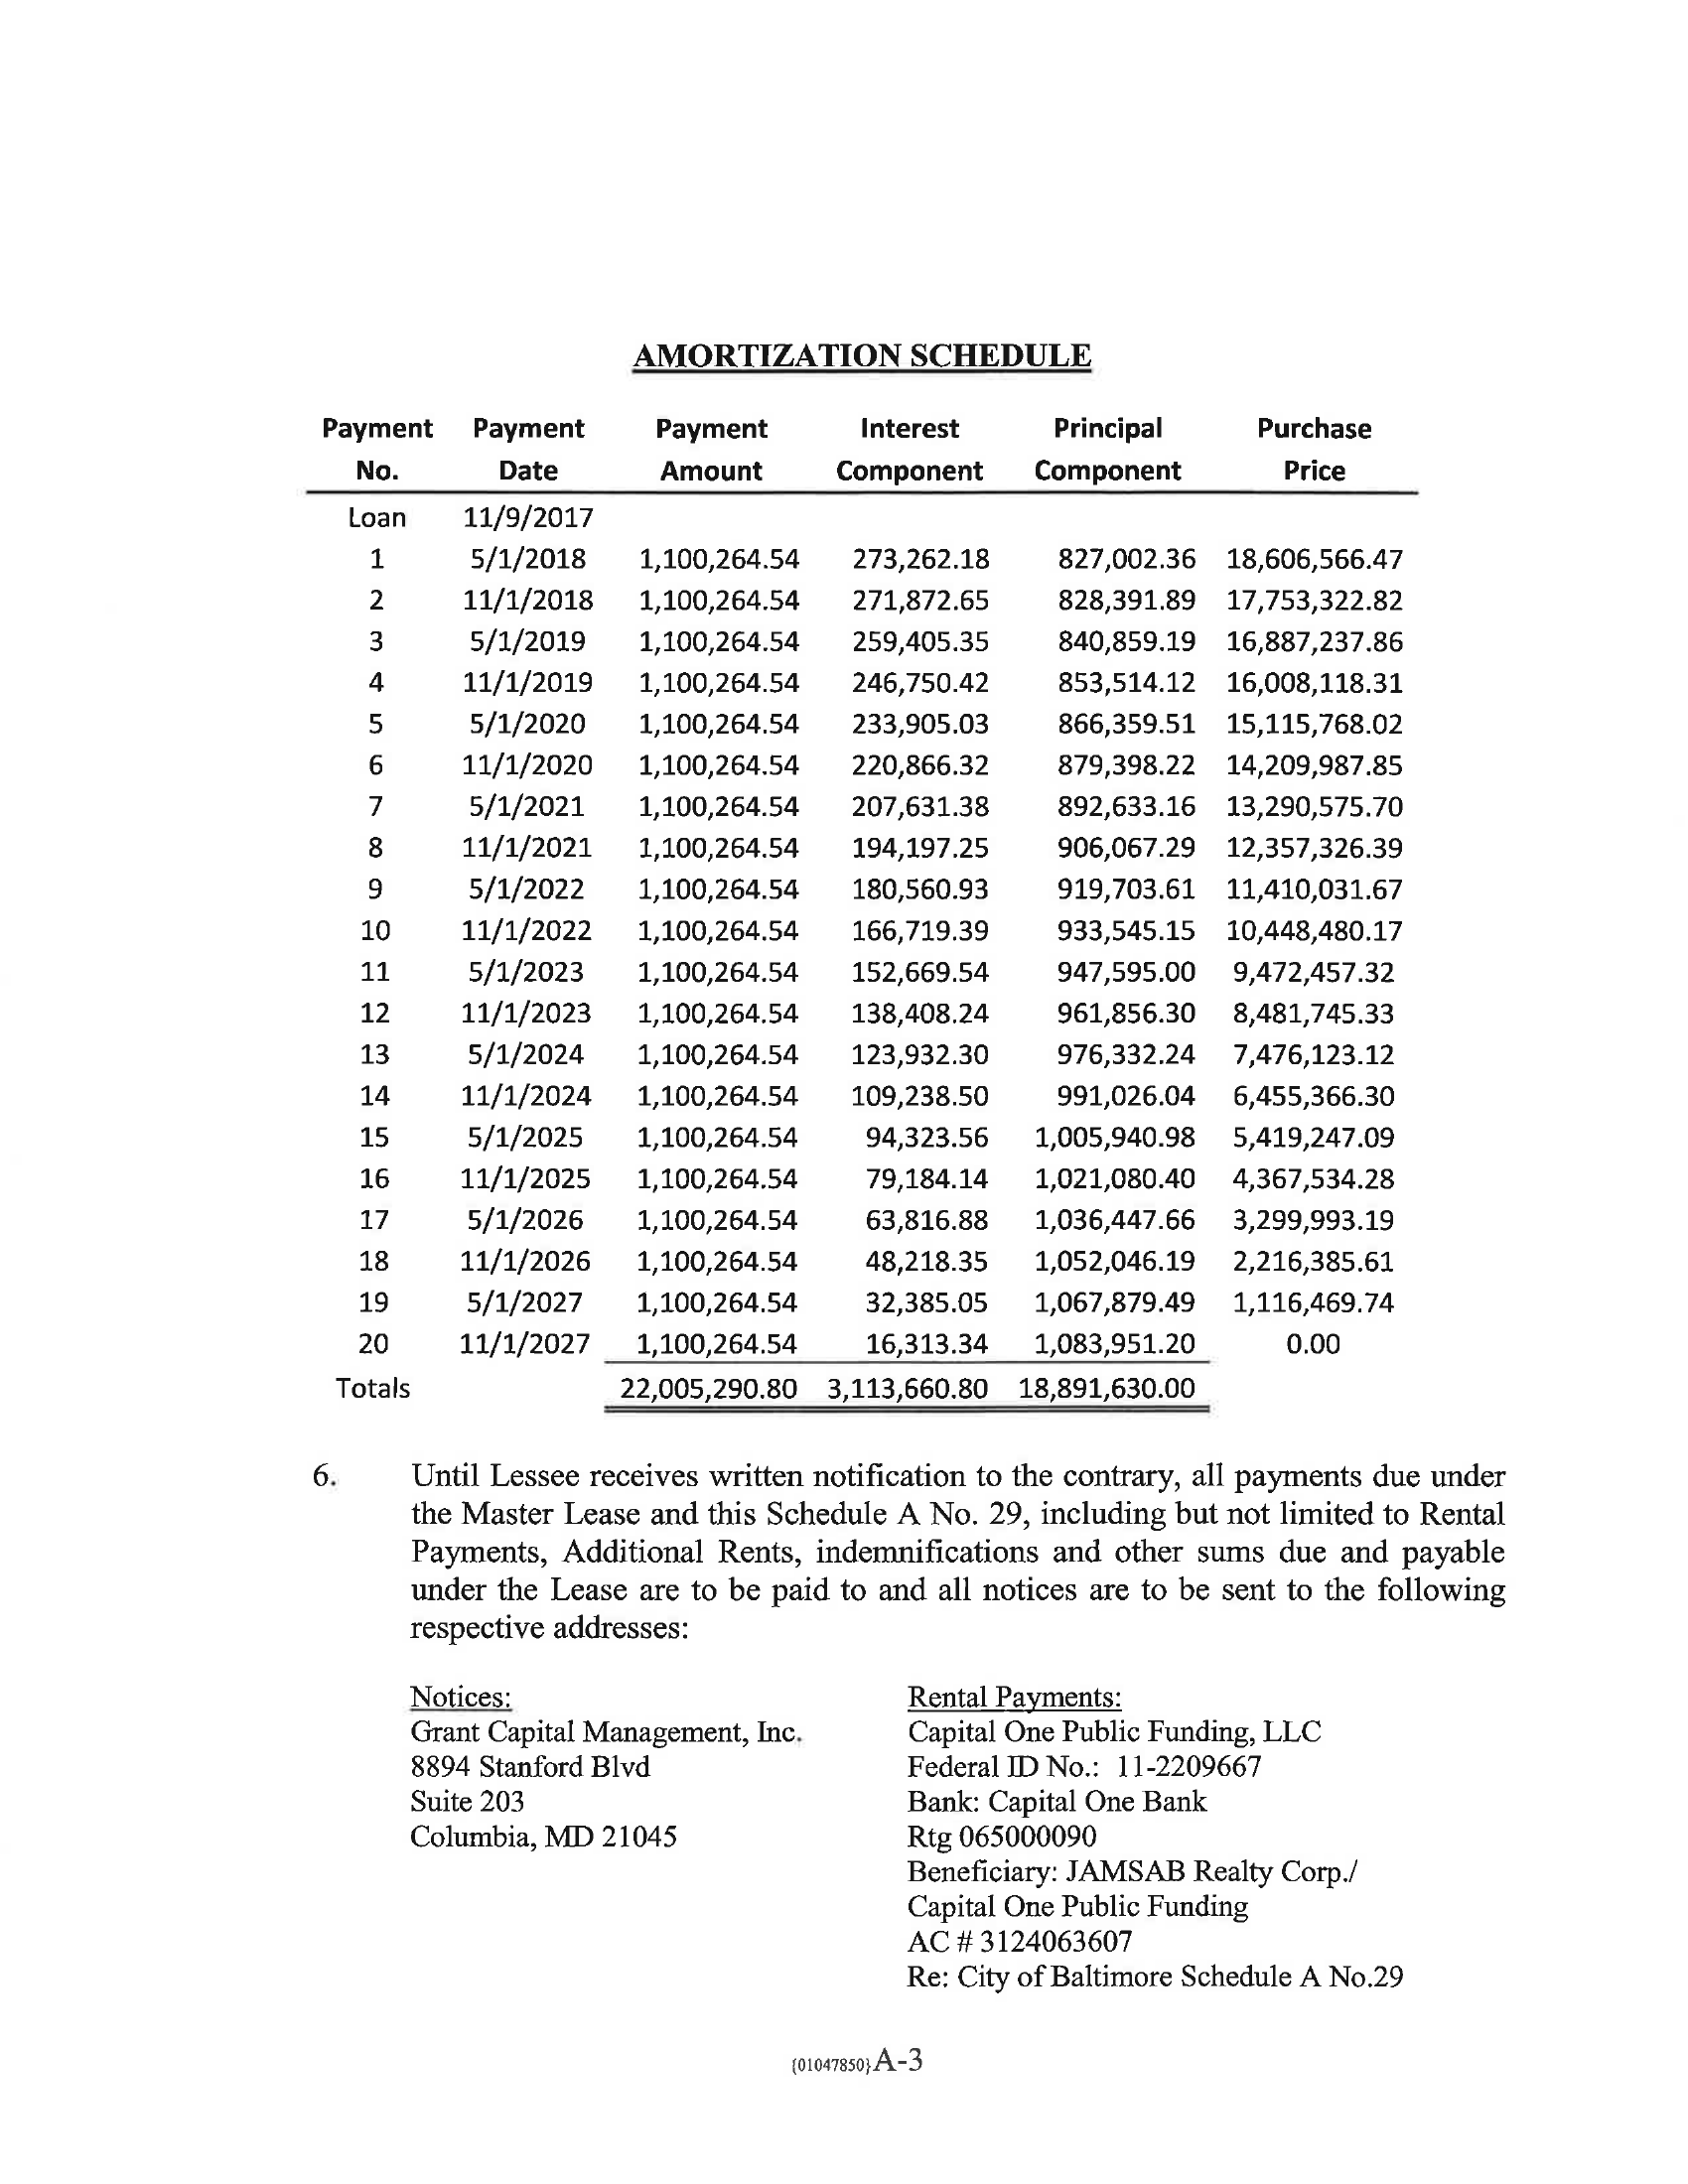

In [115]:
# target individual images or pages
scanned_pdf2image[3]

In [116]:
epa_letter2image = pdf2image.convert_from_path(scanned_pdf_epa_file)

In [117]:
len(epa_letter2image)

2

In [118]:
# returns list of individual PIL objects 
for page in epa_letter2image:
    print(page)

<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x157F76898>
<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x157F768D0>


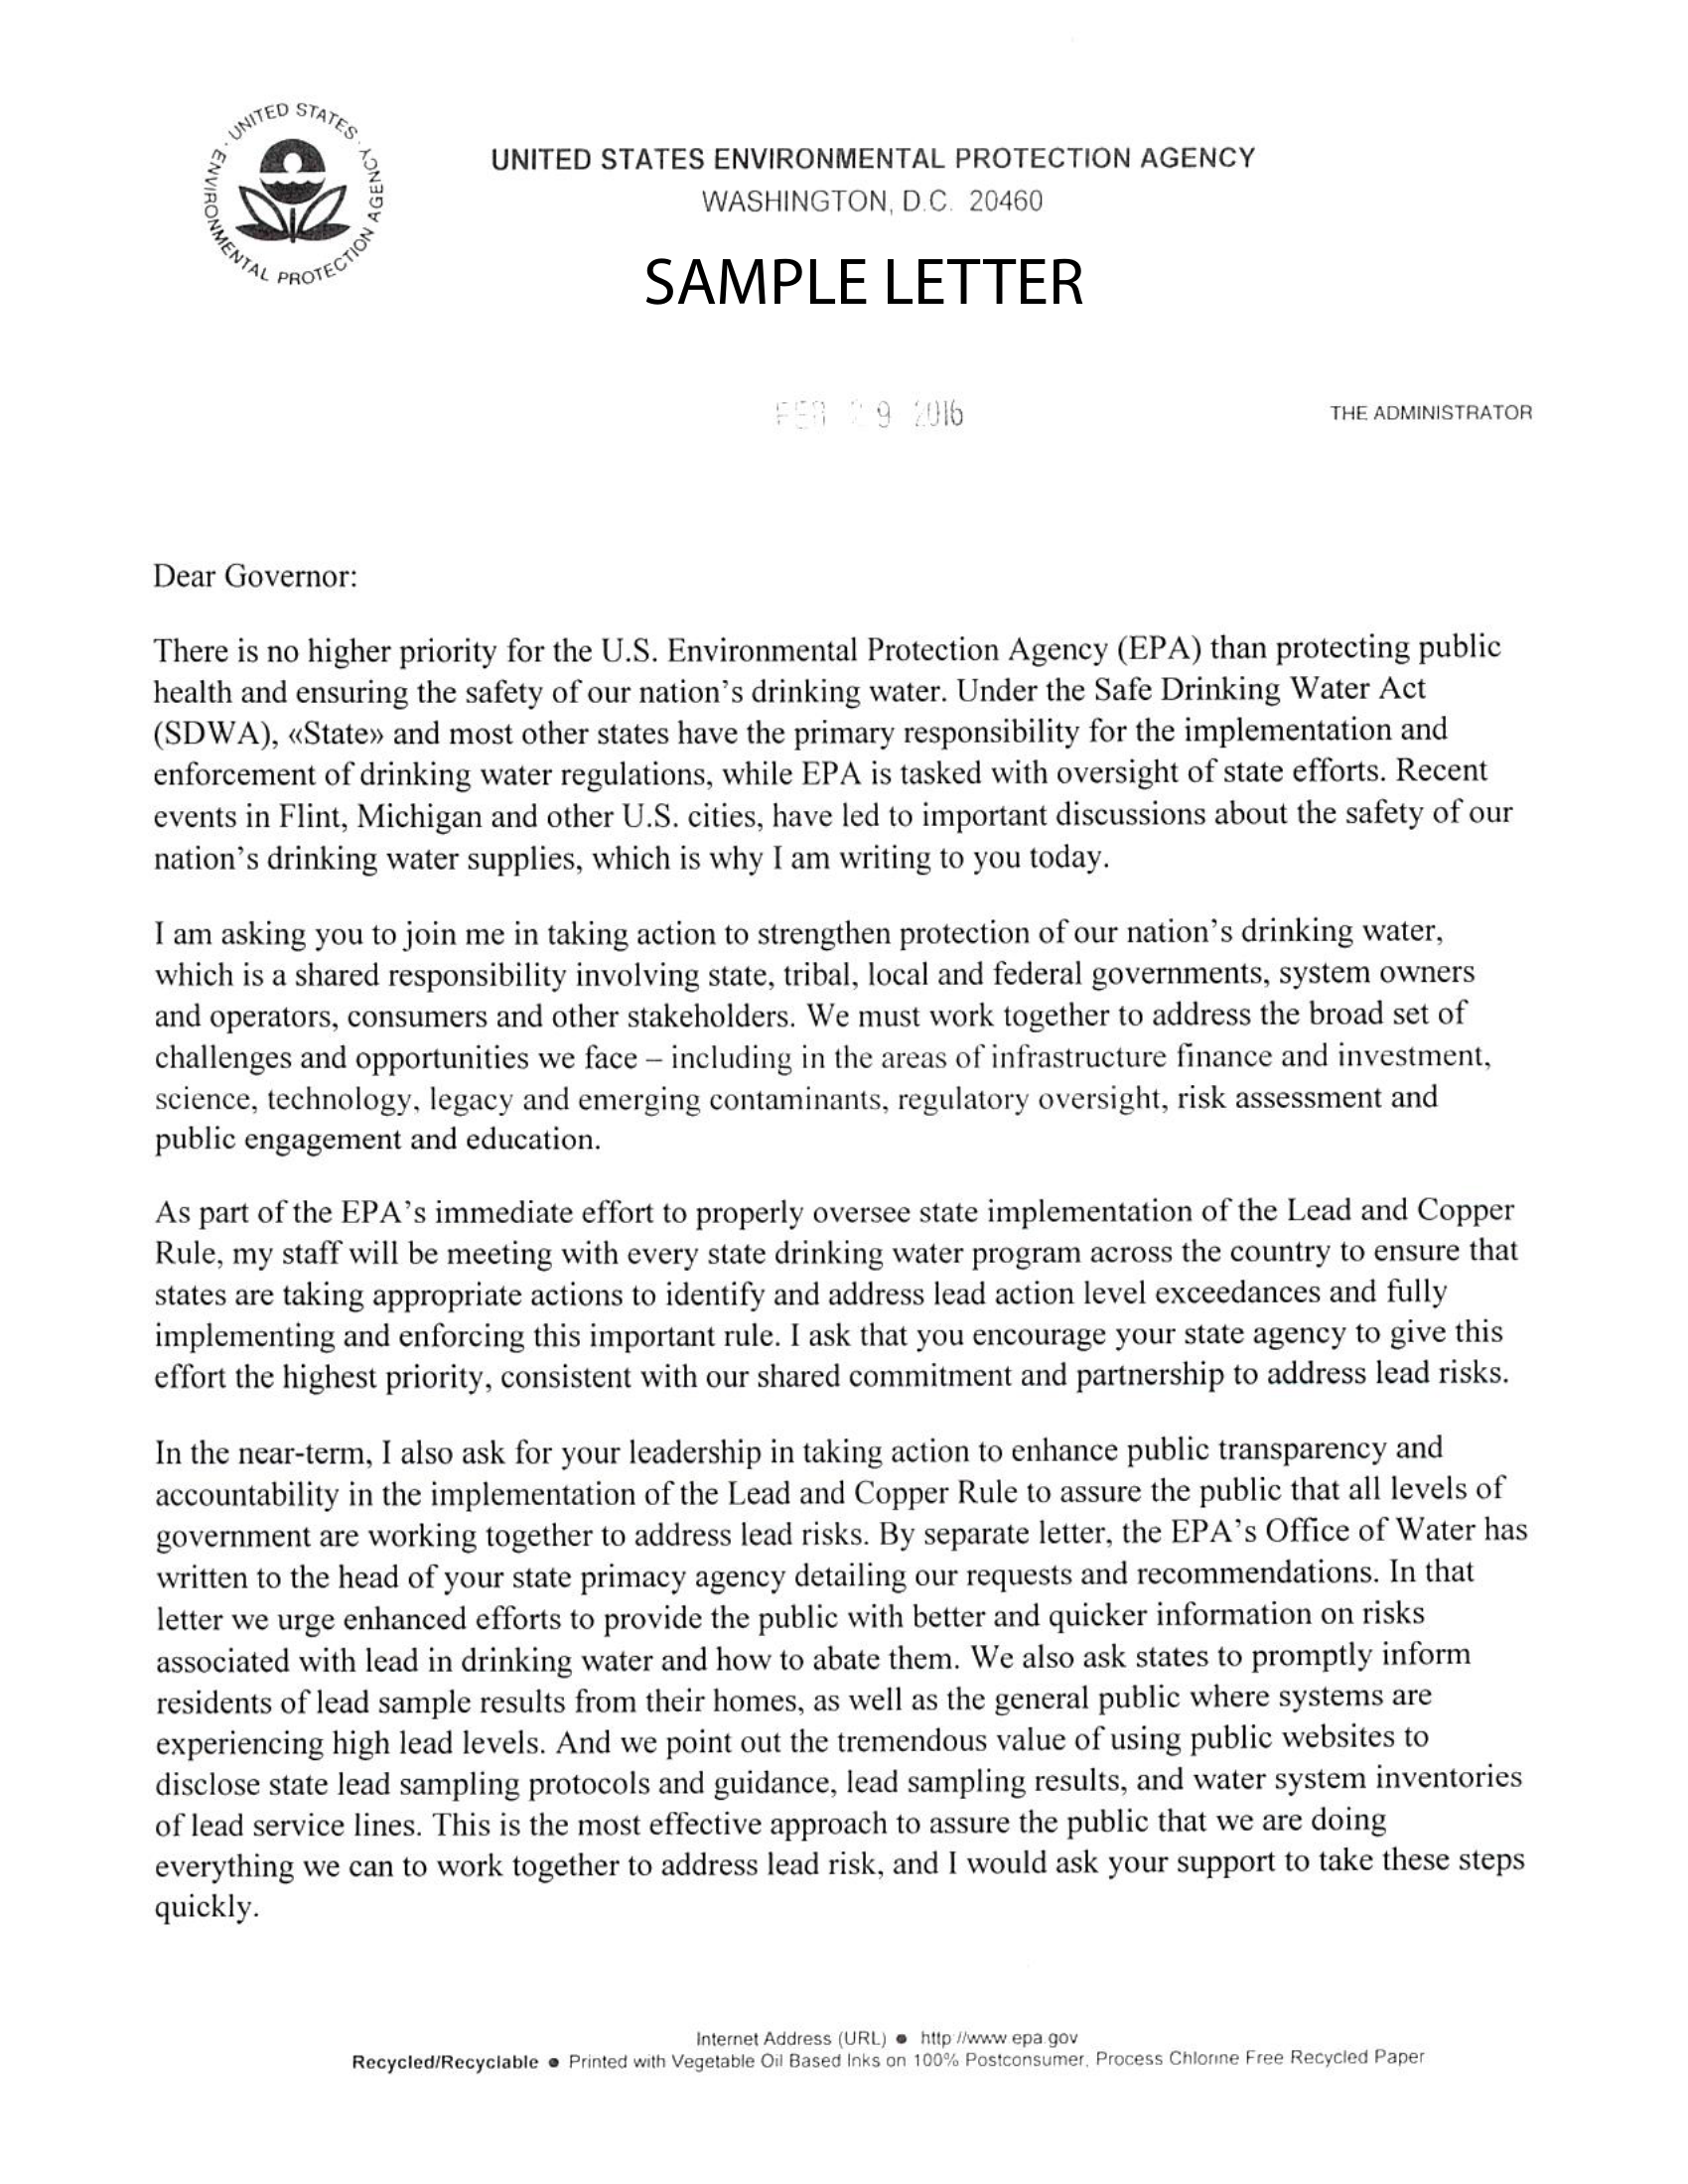

In [119]:
# acessing each page in list of PIL objects from 
epa_letter2image[0]

## <font color=green>kyrptonite: </font><font color=red>limitations</font>
1. docs:  "A relatively big PDF will use up all your memory and cause the process to be killed (unless you use an output folder.)"

## <font color=purple>working with ocrmydf</font>

In [120]:
import ocrmypdf

### <font color=green>summary</font>
1. the [documentation](https://media.readthedocs.org/pdf/ocrmypdf/latest/ocrmypdf.pdf)
2. Is a Python3 libary for adding OCR layers to PDF documents enabling text objects in a scanned PDF to be read and recognized as text, searched and copied. 
3. It uses [Google's Tesseract](https://github.com/tesseract-ocr/tesseract) OCR, an optical character recognition engine supporting many *(100+)* langauges 
4. Seems designed to run optimally from the terminal -- page 55 of docs: <font color=grey>"OCRmyPDF is currently supported as a command line interface. This means that even if you are using OCRmyPDF in a Python script, you should run it in a subprocess rather importing the ocrmypdf package"</font>
5. It works by analyzing each page in a document to determine the colorspace and resolution necessary to capture a page's information without loosing content. It creates a raster image or rasterizes the page and subsequently does OCR on the returned rasterized image, making the above referrenced 'OCR layer'.  Once this is done this layer is grafted back onto the original PDF in order to prevent the loss of metadata or details specific to the PDF.  In this way it attempts to preserve what would be lost by other tools that rasterize and then generate a new and separate image document to be parsed. 


```!mv file.pdf dir/subdir``` in notebook is equivalent to:     
```subprocess.call(['mv', file, directory])``` in script or to:  
```mv file.py dir/subdir``` in terminal

In [121]:
def move_file(f, folder):
    """ Moves folder in from . to target directory.
    
    2 required arguments:
        f      --> str: file name of the target file to be moved
        folder --> str: directory location file will be moved to
    """
    import os
    from subprocess import call
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    call(['mv', f, folder])

In [122]:
def convert_pdf(scanned_pdf, new_pdf):
    """Runs OCR on scanned pdf to retrun pdf with searchable text.
    
    2 required arguments:
        scanned_pdf --> str: the pdf from which we want to extract data
        new_pdf     --> str: the name of the new file to be generated and expects a .pdf file extension
    
    Function is designed to run in jupyter notebook, using shell 
    commands to run ocrmypdf in terminal as it was designed to be 
    used.  It converts a scanned pdf into a new pdf with searchable 
    text, moving that file into the data/pdf_data/ directory."""    
    
    import ocrmypdf
    import os
    from subprocess import call
    from datetime import datetime
    if new_pdf.split('.')[-1] == 'pdf':
        directory = 'data/pdf_data/'
        program = 'ocrmypdf' # string gets passed as first terminal argument
        date_string = datetime.now().strftime('%m-%d-%Y')
        new_pdf = new_pdf.replace('.', '-'+date_string+'.')
        call([program, scanned_pdf, new_pdf])
        move_file(f=new_pdf, folder=directory)
        print('done')
    else:
        print('Error: **Function expects .pdf file extension in new_pdf parameter')
    
    return '{}{}'.format(directory,new_pdf)

In [123]:
# searchable pdf doesn't exist yet
def before():
    !ls data/pdf_data/

In [124]:
before()

Final Exhibit A to Equipment Lease #29.pdf
Final_Exhibit_A_to_Equipment Lease_#29_copy.pdf
Thomas Canavan Resume.pdf
active_licenses.pdf
camelot-example.pdf
camelot-twisted.pdf
converted-10-13-2018.pdf
epa-letter.pdf
exhibita-10-20-2018.pdf
exhibita-10-21-2018.pdf


In [125]:
useless = file
searchable_pdf = convert_pdf(scanned_pdf=useless, new_pdf='exhibita.pdf')

done


In [126]:
searchable_pdf

'data/pdf_data/exhibita-10-21-2018.pdf'

In [127]:
def after():
    !ls data/pdf_data/

In [128]:
after()

Final Exhibit A to Equipment Lease #29.pdf
Final_Exhibit_A_to_Equipment Lease_#29_copy.pdf
Thomas Canavan Resume.pdf
active_licenses.pdf
camelot-example.pdf
camelot-twisted.pdf
converted-10-13-2018.pdf
epa-letter.pdf
exhibita-10-20-2018.pdf
exhibita-10-21-2018.pdf


#### see page 7 witness signature block for example of how handwriting impacts the ocr output

## <font color=orange>fairy dust: using PyPDF2 & ocrmypdf & textract together</font>
1. pypdf2 provides useful methods for getting page count and page number
to use on a document that has been converted from an image to a searchable pdf to target objects by conditions in metadata or by page
2. textract provides a straight forward way to get the text from a target pdf
3. Hanldes conversion of scanned documents like a champ! + grafting

In [129]:
import PyPDF2
import textract

In [130]:
PyPDF2.PdfFileReader(open(searchable_pdf,'rb')).getNumPages() 

72

In [131]:
pdf_obj = PyPDF2.PdfFileReader(searchable_pdf)
for page in range(pdf_obj.getNumPages()):
    if page != 3: # targeting page 4
        pass
    else: 
        pdf_writer = PyPDF2.PdfFileWriter()
        pdf_writer.addPage(pdf_obj.getPage(page))
        output_file = 'page{}-{}.pdf'.format(page+1,datetime.now().strftime('%m-%d-%Y'))
        with open(output_file, 'wb') as outfile:
            pdf_writer.write(outfile)
        text = textract.process(output_file)    

In [132]:
# the datatype returned from the textract function is bytes
type(text)

bytes

In [133]:
text.decode()

'AMORTIZATION SCHEDULE\nPayment\n\nPayment\n\nPayment\n\nInterest\n\nPrincipal\n\nPurchase\n\nNo.\n\nDate\n\nAmount\n\nComponent\n\nComponent\n\nPrice\n\nLoan\n1\n2\n\n11/9/2017\n5/1/2018\n11/1/2018\n\n1,100,264.54\n1,100,264.54\n\n273,262.18\n271,872.65\n\n827,002.36\n828,391.89\n\n18,606,566.47\n17,753,322.82\n\n3\n4\n5\n\n5/1/2019\n11/1/2019\n5/1/2020\n\n1,100,264.54\n1,100,264.54\n1,100,264.54\n\n259,405.35\n246,750.42\n233,905.03\n\n840,859.19\n853,514.12\n866,359.51\n\n16,887,237.86\n16,008,118.31\n15,115,768.02\n\n6\n7\n\n11/1/2020\n5/1/2021\n\n1,100,264.54\n1,100,264.54\n\n220,866.32\n207,631.38\n\n879,398.22\n892,633.16\n\n14,209,987.85\n13,290,575.70\n\n8\n9\n\n11/1/2021\n5/1/2022\n\n1,100,264.54\n1,100,264.54\n\n194,197.25\n180,560.93\n\n906,067.29\n919,703.61\n\n12,357,326.39\n11,410,031.67\n\n10\n11\n\n11/1/2022\n5/1/2023\n\n1,100,264.54\n1,100,264.54\n\n166,719.39\n152,669.54\n\n933,545.15\n947,595.00\n\n10,448,480.17\n9,472,457.32\n\n12\n\n11/1/2023\n\n1,100,264.54\n\n13

In [134]:
data_string = text.decode()

In [135]:
header = (data_string.split('Loan\n1\n2\n\n11/9/2017')[0]).split('SCHEDULE')[1]
cols = []
for idx, item in enumerate(header.split()):
    if (idx == 0) | (idx == 1) | (idx == 2):
        cols.append('{} {}'.format(header.split()[0], header.split()[idx+6]))
    elif (idx == 3) | (idx == 4):
        cols.append('{} {}'.format(header.split()[idx],header.split()[9]))
    elif (idx == 5):
        cols.append('{} {}'.format(header.split()[5], header.split()[11]))
        
cut_off = '\n\n22,005,290.80\n\n3,113,660.80\n\n18,891,630.00\n\nTotals'     
table_string = (data_string.split('Loan\n1\n2\n\n11/9/2017')[1]).split(cut_off)[0]

In [136]:
cols

['Payment No.',
 'Payment Date',
 'Payment Amount',
 'Interest Component',
 'Principal Component',
 'Purchase Price']

In [137]:
table_string

'\n5/1/2018\n11/1/2018\n\n1,100,264.54\n1,100,264.54\n\n273,262.18\n271,872.65\n\n827,002.36\n828,391.89\n\n18,606,566.47\n17,753,322.82\n\n3\n4\n5\n\n5/1/2019\n11/1/2019\n5/1/2020\n\n1,100,264.54\n1,100,264.54\n1,100,264.54\n\n259,405.35\n246,750.42\n233,905.03\n\n840,859.19\n853,514.12\n866,359.51\n\n16,887,237.86\n16,008,118.31\n15,115,768.02\n\n6\n7\n\n11/1/2020\n5/1/2021\n\n1,100,264.54\n1,100,264.54\n\n220,866.32\n207,631.38\n\n879,398.22\n892,633.16\n\n14,209,987.85\n13,290,575.70\n\n8\n9\n\n11/1/2021\n5/1/2022\n\n1,100,264.54\n1,100,264.54\n\n194,197.25\n180,560.93\n\n906,067.29\n919,703.61\n\n12,357,326.39\n11,410,031.67\n\n10\n11\n\n11/1/2022\n5/1/2023\n\n1,100,264.54\n1,100,264.54\n\n166,719.39\n152,669.54\n\n933,545.15\n947,595.00\n\n10,448,480.17\n9,472,457.32\n\n12\n\n11/1/2023\n\n1,100,264.54\n\n138,408.24\n\n961,856.30\n\n8,481,745.33\n\n13\n14\n\n5/1/2024\n11/1/2024\n\n1,100,264.54\n1,100,264.54\n\n123,932.30\n109,238.50\n\n976,332.24\n991,026.04\n\n7,476,123.12\n6,455

In [138]:
table_string.split()

['5/1/2018',
 '11/1/2018',
 '1,100,264.54',
 '1,100,264.54',
 '273,262.18',
 '271,872.65',
 '827,002.36',
 '828,391.89',
 '18,606,566.47',
 '17,753,322.82',
 '3',
 '4',
 '5',
 '5/1/2019',
 '11/1/2019',
 '5/1/2020',
 '1,100,264.54',
 '1,100,264.54',
 '1,100,264.54',
 '259,405.35',
 '246,750.42',
 '233,905.03',
 '840,859.19',
 '853,514.12',
 '866,359.51',
 '16,887,237.86',
 '16,008,118.31',
 '15,115,768.02',
 '6',
 '7',
 '11/1/2020',
 '5/1/2021',
 '1,100,264.54',
 '1,100,264.54',
 '220,866.32',
 '207,631.38',
 '879,398.22',
 '892,633.16',
 '14,209,987.85',
 '13,290,575.70',
 '8',
 '9',
 '11/1/2021',
 '5/1/2022',
 '1,100,264.54',
 '1,100,264.54',
 '194,197.25',
 '180,560.93',
 '906,067.29',
 '919,703.61',
 '12,357,326.39',
 '11,410,031.67',
 '10',
 '11',
 '11/1/2022',
 '5/1/2023',
 '1,100,264.54',
 '1,100,264.54',
 '166,719.39',
 '152,669.54',
 '933,545.15',
 '947,595.00',
 '10,448,480.17',
 '9,472,457.32',
 '12',
 '11/1/2023',
 '1,100,264.54',
 '138,408.24',
 '961,856.30',
 '8,481,745.33

In [139]:
def comparing_ocr_parsing_outputs():
    display(HTML("<table><tr><td><img src='images/page4-orcmypdf-parsing-pattern.png'></td><td><img src='images/page4-algo-chunk-image.png' height=900, width=900></td></tr></table>"))

In [140]:
comparing_ocr_parsing_outputs()

## unpacking the return

![](images/bytes-text-pattern.jpg)

In [141]:
def create_dataframe():
    """Returns dataframe of amortizaton schedule from scanned pdf.
    
    It generates a target page as a separate and new pdf and puts the page 
    object into a pdf_data folder in a /data directory and subsequently pushes
    text data from the new pdf into a pandas dataframe. 
    
    """
    
    pdf = PyPDF2.PdfFileReader(searchable_pdf)
    for page in range(pdf.getNumPages()):
        if page != 3: # targeting table on page 4
            pass
        else: # targeting page 4
            pdf_writer = PyPDF2.PdfFileWriter()
            pdf_writer.addPage(pdf.getPage(page))
            output_file = 'page{}-{}.pdf'.format(page+1,datetime.now().strftime('%m-%d-%Y'))
            with open(output_file, 'wb') as outfile:
                pdf_writer.write(outfile)
            text = textract.process(output_file)  
    data_string = text.decode() 
    
    # break returned bytes into relevant chunks for dataframe
    header = (data_string.split('Loan\n1\n2\n\n11/9/2017')[0]).split('SCHEDULE')[1]
    cols = []
    for idx, item in enumerate(header.split()):
        if (idx == 0) | (idx == 1) | (idx == 2):
            cols.append('{} {}'.format(header.split()[0], header.split()[idx+6]))
        elif (idx == 3) | (idx == 4):
            cols.append('{} {}'.format(header.split()[idx],header.split()[9]))
        elif (idx == 5):
            cols.append('{} {}'.format(header.split()[5], header.split()[11]))

    cut_off = '\n\n22,005,290.80\n\n3,113,660.80\n\n18,891,630.00\n\nTotals'     
    table_string = (data_string.split('Loan\n1\n2\n\n11/9/2017')[1]).split(cut_off)[0] 
    
    
    # examine the pattern of the representation of ocr returned bytes data 
    one_loop_index_locations = [65]
    two_loops_index_locations = [0,1,30,31,42,43,54,55,72,73,84,85,96,97,108,109]
    three_loops_index_locations = [13,14,15]

    table_dict = {}
    for idx, info in enumerate(table_string.split()):
        if idx in one_loop_index_locations:
            i = 0
            i += 1
            table_dict[pd.to_datetime(info)] = [(table_string.split()[idx+1+(i*1)]) for i in range(4)]
        elif idx in two_loops_index_locations:
            i = 0
            i += 2
            table_dict[pd.to_datetime(info)] = [(table_string.split()[idx+2+(i*2)]) for i in range(4)]
        elif idx in three_loops_index_locations:
            i = 0
            i += 3
            table_dict[pd.to_datetime(info)] = [(table_string.split()[idx+3+(i*3)]) for i in range(4)]
            
    # create dataframe   
    df_from_dict = pd.DataFrame.from_dict(table_dict)
    df = pd.DataFrame.transpose(df_from_dict)
    df.columns = cols[2:]
    for col in df.columns: # change data type from strings to float
        df[col] = df[col].apply(lambda x: float(x.replace(',','')))
    
    return df

In [142]:
dataframe = create_dataframe()

In [143]:
dataframe

Payment Amount  Interest Component  Principal Component  \
2018-05-01      1100264.54           273262.18            827002.36   
2018-11-01      1100264.54           271872.65            828391.89   
2019-05-01      1100264.54           259405.35            840859.19   
2019-11-01      1100264.54           246750.42            853514.12   
2020-05-01      1100264.54           233905.03            866359.51   
2020-11-01      1100264.54           220866.32            879398.22   
2021-05-01      1100264.54           207631.38            892633.16   
2021-11-01      1100264.54           194197.25            906067.29   
2022-05-01      1100264.54           180560.93            919703.61   
2022-11-01      1100264.54           166719.39            933545.15   
2023-05-01      1100264.54           152669.54            947595.00   
2023-11-01      1100264.54           138408.24            961856.30   
2024-05-01      1100264.54           123932.30            976332.24   
2024-11-01      1100264.54           109238.50            991026.04   
2025-05-01      1100264.54            94323.56           1005940.98   
2025-11-01      1100264.54            79184.14           1021080.40   
2026-05-01      1100264.54            63816.88           1036447.66   
2026-11-01      1100264.54            48218.35           1052046.19   
2027-05-01      1100264.54            32385.05           1067879.49   
2027-11-01      1100264.54            16313.34           1083951.20   

            Purchase Price  
2018-05-01     18606566.47  
2018-11-01     17753322.82  
2019-05-01     16887237.86  
2019-11-01     16008118.31  
2020-05-01     15115768.02  
2020-11-01     14209987.85  
2021-05-01     13290575.70  
2021-11-01     12357326.39  
2022-05-01     11410031.67  
2022-11-01     10448480.17  
2023-05-01      9472457.32  
2023-11-01      8481745.33  
2024-05-01      7476123.12  
2024-11-01      6455366.30  
2025-05-01      5419247.09  
2025-11-01      4367534.28  
2026-05-01      3299993.19  
2026-11-01      2216385.61  
2027-05-01      1116469.74  
2027-11-01            0.00

In [144]:
# file not present prior to function call to save as excel
!ls data/excel_data/

exhibita-10-20-2018.xlsx        tabula-to-excel-10-20-2018.xlsx
exhibita-10-21-2018.xlsx


In [145]:
def generate_excel(df, outfile_name, folder='data/excel_data/'):
    """Converts pandas dataframe to excel file and saves as .xlsx file.
    
    2 required arguments 1 optional:
        df            --> dataframe: is the dataframe object retruned from create_dataframe()
                          which formats the scraped scanned pdf table to usable data
        outfile_name  --> str: is the name of the new excel file to be generated. this argument 
                          expects a .xlsx file extention 
        folder        --> str: is the target directory where the file should be saved
    """
    writer = pd.ExcelWriter(folder+outfile_name+'-{}.xlsx'.format(datetime.now().strftime('%m-%d-%Y')))
    pd.DataFrame.to_excel(df, excel_writer=writer)
    writer.save()
    return ('new file: {}-{}.xlsx'.format(outfile_name, datetime.now().strftime('%m-%d-%Y'))) 

In [146]:
!ls data/excel_data/

exhibita-10-20-2018.xlsx        tabula-to-excel-10-20-2018.xlsx
exhibita-10-21-2018.xlsx


In [147]:
generate_excel(dataframe,'exhibita')

'new file: exhibita-10-21-2018.xlsx'

In [148]:
!ls data/excel_data/

exhibita-10-20-2018.xlsx        tabula-to-excel-10-20-2018.xlsx
exhibita-10-21-2018.xlsx


## <font color=green>kryptonite: </font><font color=red>limitations</font>
1. Text output from ocr requires inspection of underlying patterns to unpack and create a dataframe for analysis or delivery to another process.
2. underlying patterns dictated by document structure requiring individual inspection and customization:
 
 
* payment data data
* table structure packing 4 across rows
* patterns in strings


## <font color=purple>workign with pytesseract</font>

In [149]:
import pdf2image
import pytesseract
from PIL import Image

### <font color=green>summary</font>
1. the [documentation](https://pypi.org/project/pytesseract/#description)
2. Is an OCR tool for Python that recognizes and reads text embeded in images and can read image types supported by PIL including:  jpeg, png, gif, [bmp](https://en.wikipedia.org/wiki/BMP_file_format), [tiff](https://en.wikipedia.org/wiki/TIFF)
3. Wrapper for [Google's OCR engine](https://opensource.google.com/projects/tesseract).....what they use for text detection on mobile devices and videos, Gmail image spam detection 
4. Key methods & parameters: 



* image_to_string
* image_to_pdf_or_hocr
* <b>lang</b>


```scanned_pdf_epa_file = 'data/pdf_data/epa-letter.pdf'```



```file = 'data/pdf_data/Final Exhibit A to Equipment Lease #29.pdf'```

### <font color=green>kryptonite: </font><font color=red>limitations</font>
1. pytesseract throws erros if your PDF is not an image even for scanned PDFs that functionally are non searchable pics of text documents.

**a place in the workflow for a script, function, module or manual labor to prepare image files for pytesseract**

```pytesseract.image_to_string(file)```

![](images/pytesseract-error-msg.png)

can we open as image like docs?
```pytesseract.image_to_string(Image.open(file))```

![](images/second-pytesseract-error.png)

```pytesseract.image_to_string(Image.open(scanned_pdf_epa_file))```

![](images/third-pytesseract-error.png)

## <font color=orange>use pdf2image package with pytesseract to convert scanned PDFs to PIL images and extracting text from those objects<font>

In [150]:
# using pdf2image for preprocessing
epa_letter_file_img = pdf2image.convert_from_path(scanned_pdf_epa_file)
epa_letter_file_img

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x12A2166D8>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x12A216AC8>]

In [151]:
type(epa_letter_file_img[0])

PIL.PpmImagePlugin.PpmImageFile

In [152]:
epa_letter_file_img

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x12A2166D8>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x12A216AC8>]

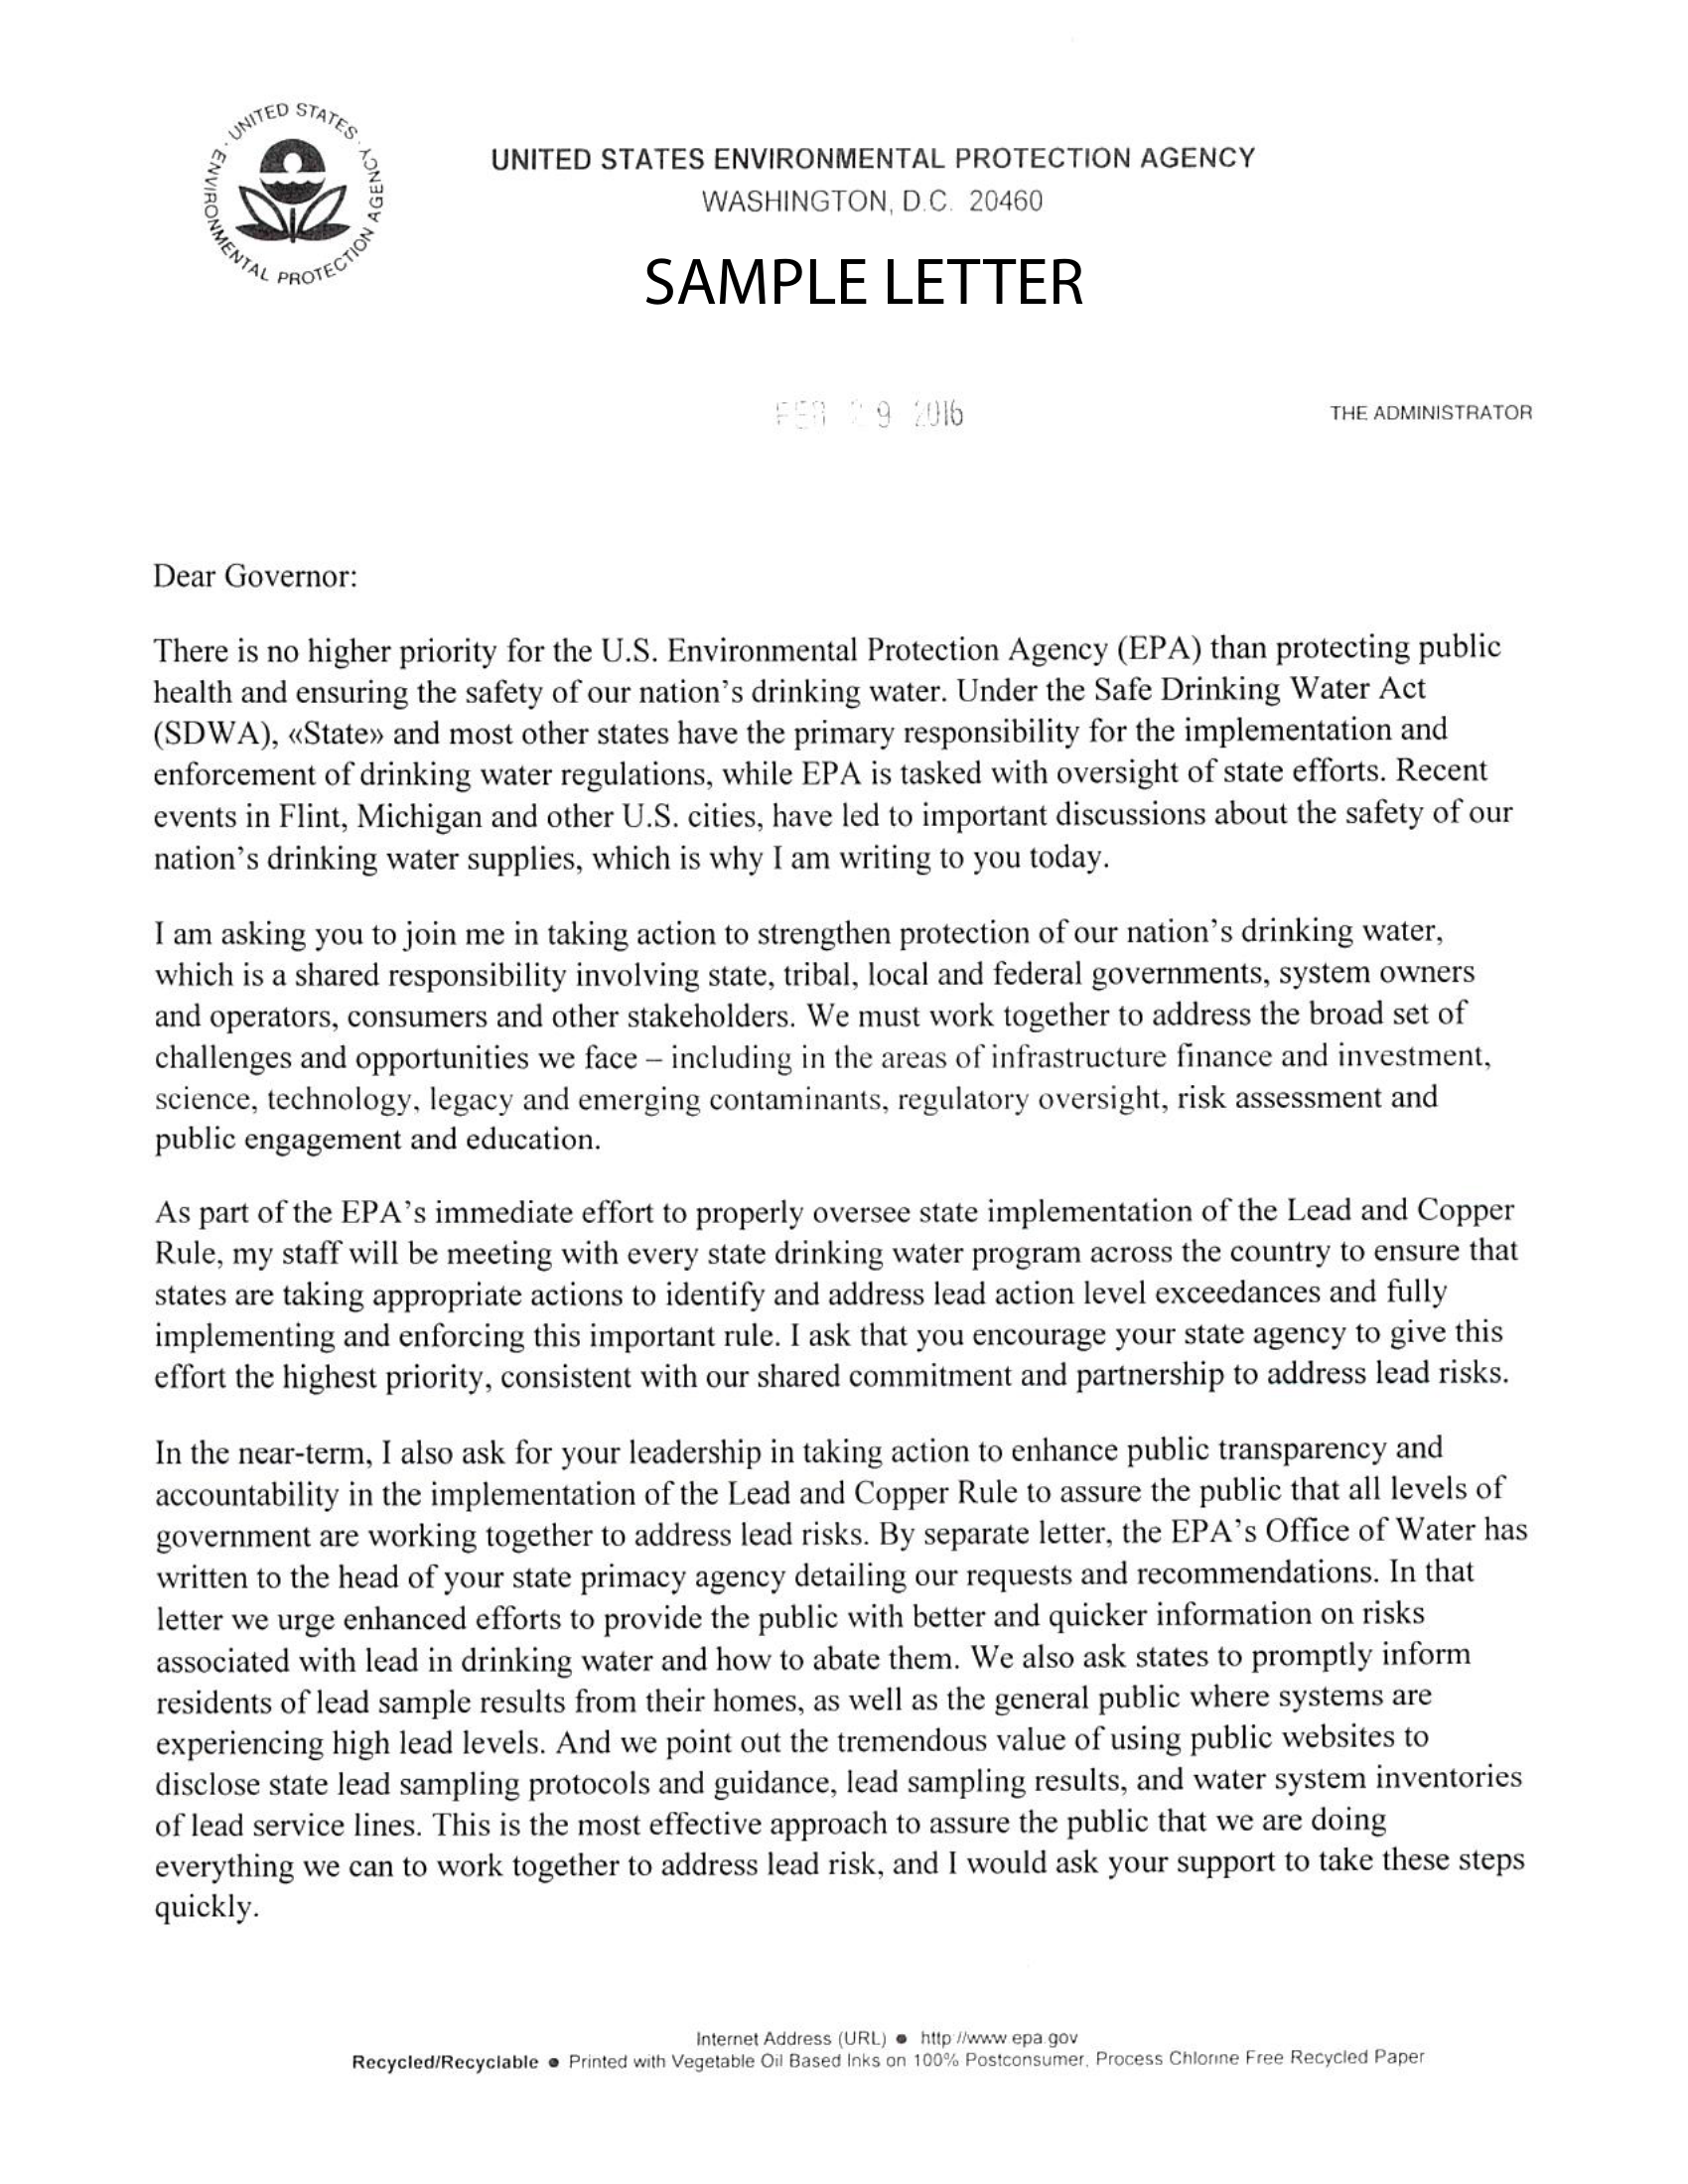

In [153]:
page1_epa_letter = epa_letter_file_img[0]
page1_epa_letter

In [154]:
amortization_document_as_PILimage = pdf2image.convert_from_path(file)

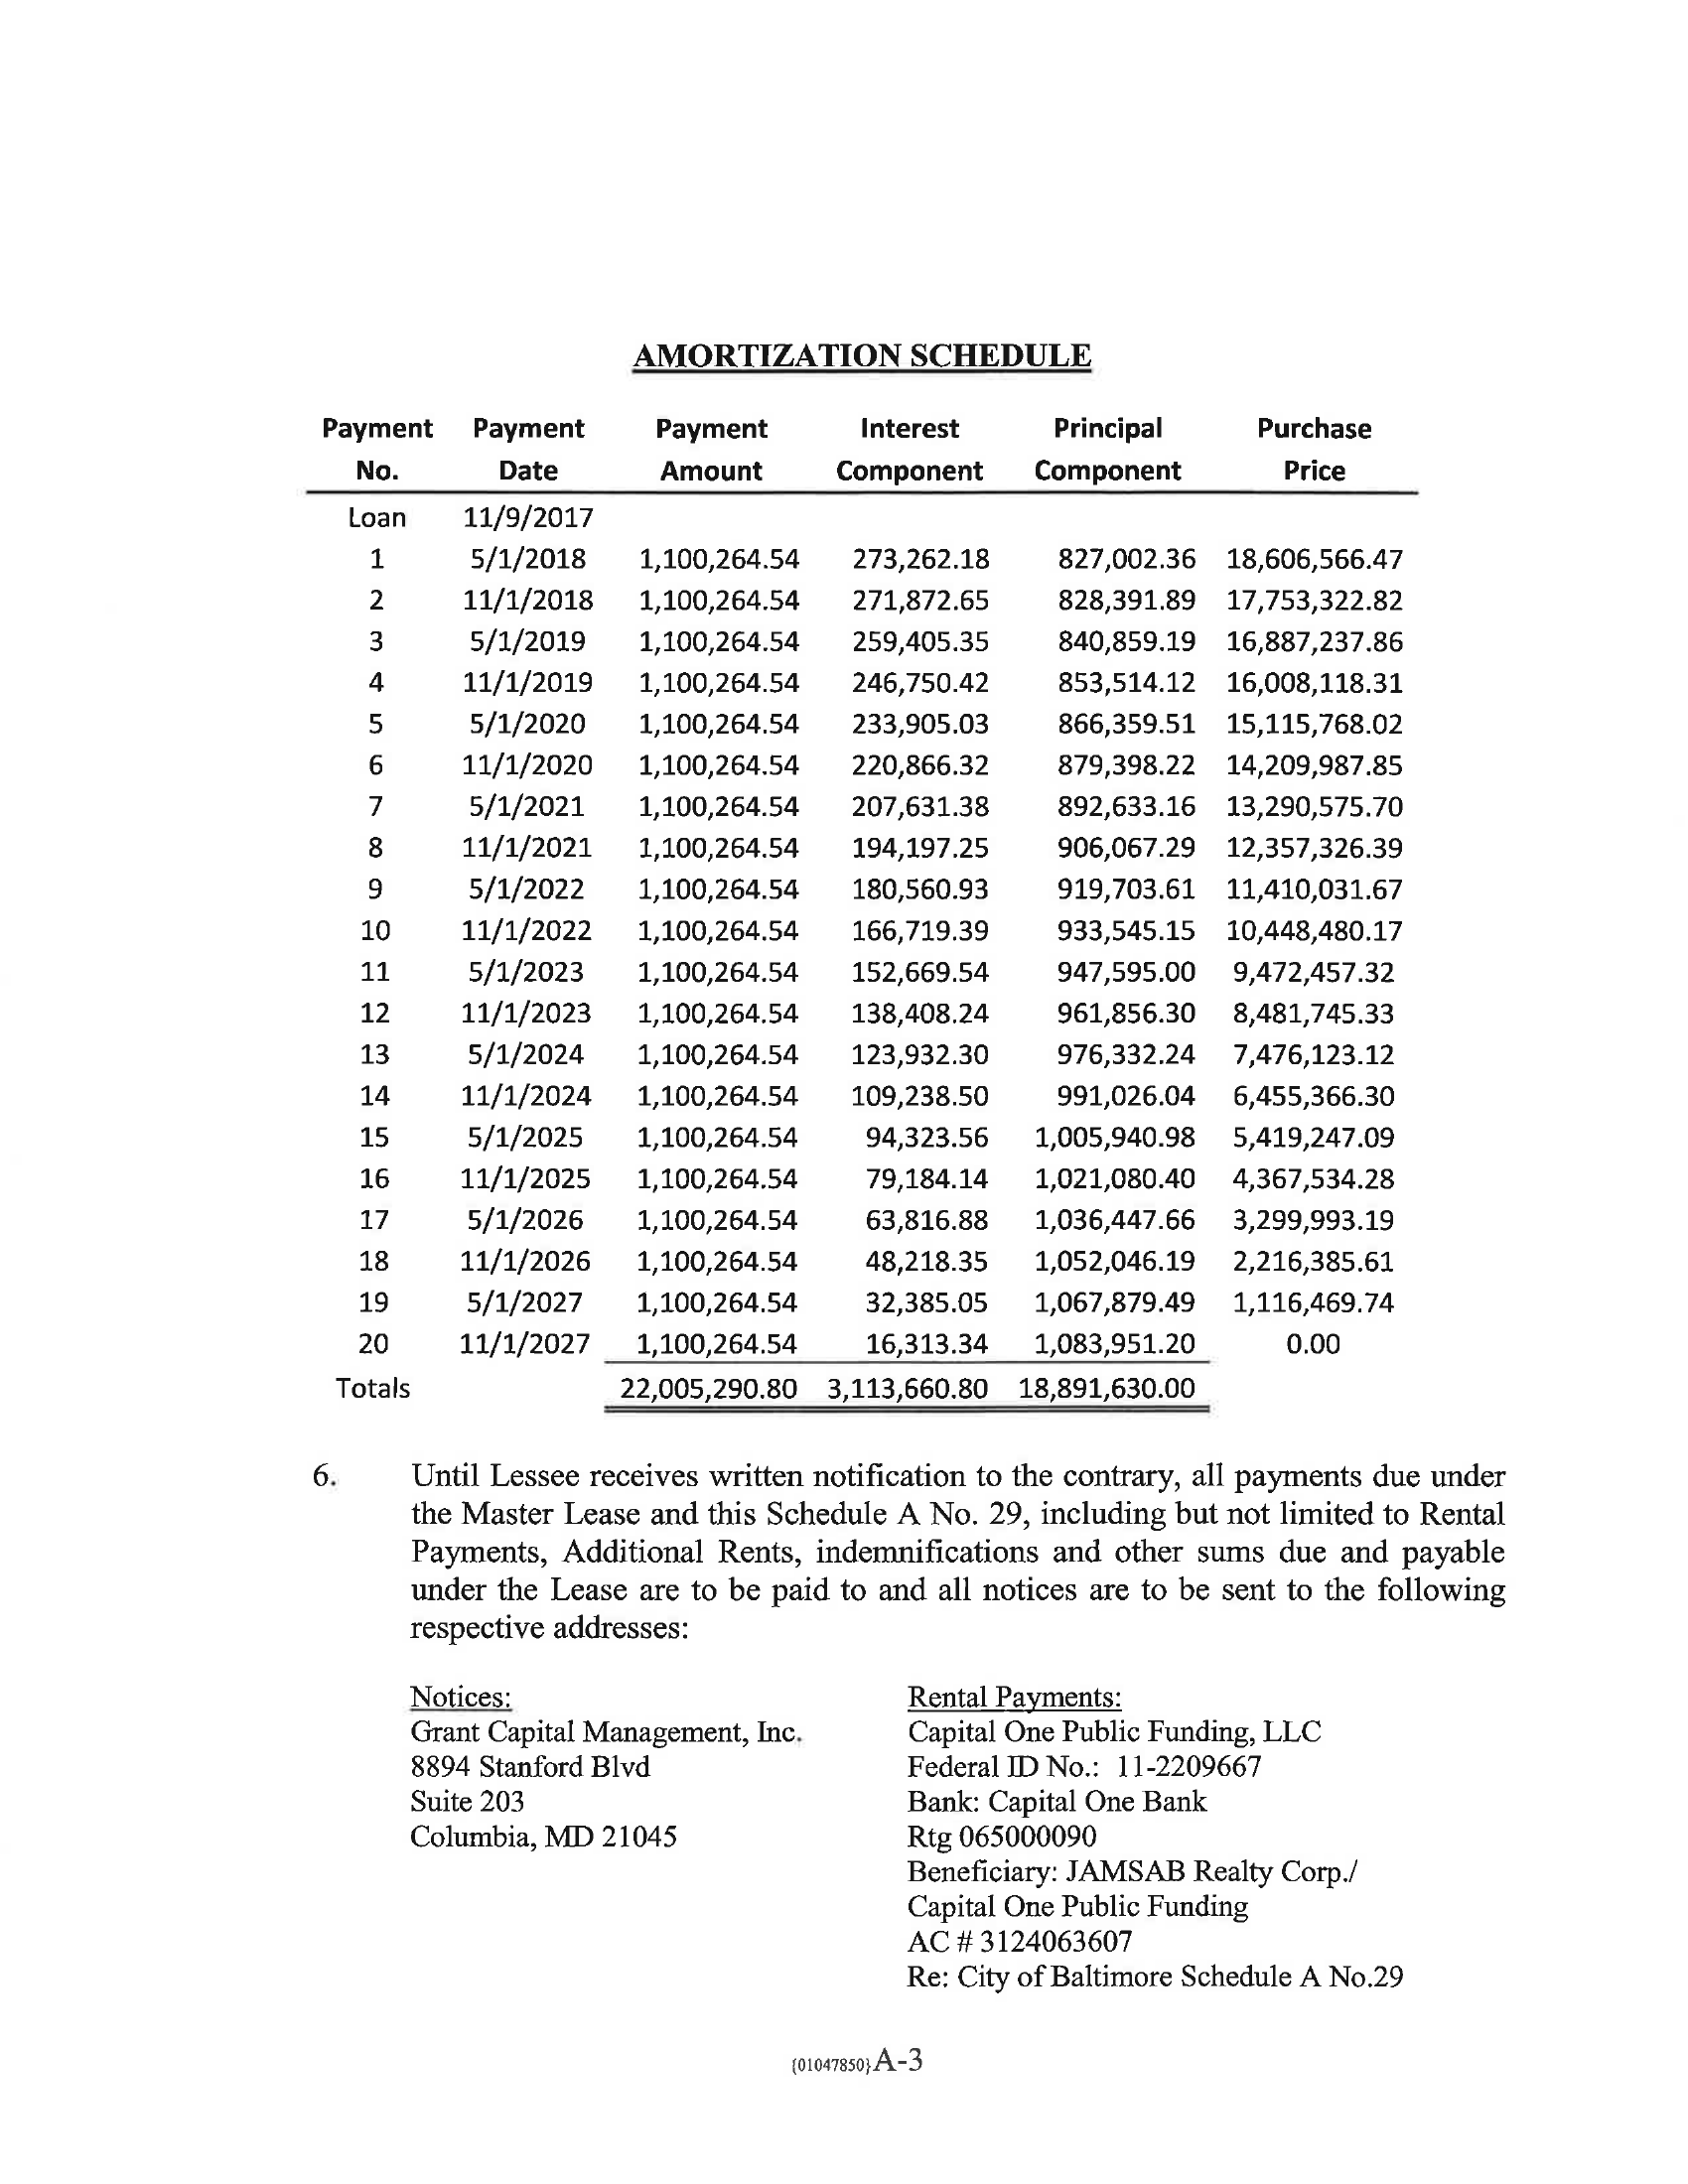

In [155]:
page4 = amortization_document_as_PILimage[3]
# create an image file for this document
page4.save('data/img_data/page4-{}-pdf2image.png'.format(datetime.now().strftime('%m-%d-%Y')),'png')
page4

In [156]:
!ls data/img_data/

Final Exhibit A to Equipment Lease #29.png
active-license-10-18-2018.png
active-license-page1-10-18-2018.png
active-license-page1-10-19-2018.png
active-license-page1-10-20-2018.png
active-license-page2-10-18-2018.png
active-license-page2-10-19-2018.png
active-license-page2-10-20-2018.png
epa-letter.png
page4-10-17-2018-pdf2image.png
page4-10-18-2018-pdf2image.png
page4-10-20-2018-pdf2image.png
page4-10-21-2018-pdf2image.png


## <font color=orange>document 1</font>

In [157]:
# combining pdf2image & pytesseract returns useful results when not targeting tabular data
pytesseract.image_to_string(page1_epa_letter)

'UNITED STATES ENVIRONMENTAL PROTECTION AGENCY\nWASHINGTON, D C 20460\n\nSAMPLE LETTER\n\n\'r “lb THE ADMlNlSTRATOR\n\nDear Governor:\n\nThere is no higher priority for the US. Environmental Protection Agency (EPA) than protecting public\nhealth and ensuring the safety of our nation’s drinking water. Under the Safe Drinking Water Act\n(SDWA), «State» and most other states have the primary responsibility for the implementation and\nenforcement of drinking water regulations, while EPA is tasked with oversight of state efforts. Recent\nevents in Flint, Michigan and other US. cities, have led to important discussions about the safety of our\nnation’s drinking water supplies, which is why I am writing to you today.\n\nI am asking you to join me in taking action to strengthen protection ofour nation’s drinking water.\nwhich is a shared responsibility involving state, tribal. local and federal governments. system owners\nand operators, consumers and other stakeholders. We must work together t

In [158]:
first_page_epa_letter =  pdf2image.convert_from_path(epa_letter_file)[0]

NameError: name 'epa_letter_file' is not defined

In [ ]:
display(HTML("<table><tr><td><img src='images/pytesseract-first-page-epa-letter.png' width=1200, hieght=1200></td><td><img src='images/epa-first-page.png'></td></tr></table>"))

In [ ]:
pytesseract.image_to_string(first_page_epa_letter)

## <font color=red>document 2</font>

In [ ]:
# combining pdf2image & pytesseract but the underlying conversion algorithm doesn't produce predictable pattern on tabular data
pytesseract.image_to_string('data/img_data/page4-10-17-2018-pdf2image.png')

In [ ]:
# how does the underlying algorithm parse and return with pytesseract
# not easy to unpack pattern espcially if needs are large scale conversion across multiple 
# pdf table types or structures
display(HTML("<table><tr><td><img src='images/page4-image.png'></td><td><img src='images/pytesseract-imag2string-result.png'></tr></table>"))

## <font color=red>document 3</font>

In [ ]:
# using pdf2image to convert to images, save indivdual image pages 
# and convert image to string object for each page with pytesseract
for pg, item in enumerate(pdf2image.convert_from_path(searchable_pdf_license_file)):
    item.save('data/img_data/active-license-page{}-{}.png'.format(pg+1,datetime.now().strftime('%m-%d-%Y')), 'png')
    print('\n***** new page *****\n')
    print(pytesseract.image_to_string(item))

**In the conversion of the image to a text string, pytesseract chunks the text by what it perceives to be the column breaks with performance and outcome sensitive to spacing of text in the original PDF**

## <font color=orange>comparing performance of <font color=blue>pytesseract</font> to <font color=darkblue>camelot</font></font>
* reading <font color=blue><b>y</b></font> vs reading <font color=darkblue><b>x</b></font>

In [ ]:
import camelot 
camelot.read_pdf(searchable_pdf_license_file, flavor='stream')[0].data

## <font color=purple> working with camelot</font>

### <font color=green>summary</font>
1. the [documentation](https://camelot-py.readthedocs.io/en/master/user/quickstart.html#read-the-pdf)
2. [Camelot](https://camelot-py.readthedocs.io/en/master/) is written in Python. 
3. It only works with text-based PDFs; if you are working with a document where you can click, drag or select text, you are in business. If document is a scanned image, Camelot is not your tool. 
4. Each table is a Pandas dataframe, easier for ETL workflows
5. Camelot gives 2 options or methods for parsing PDF tables: <font color=orange>Stream</font> & <font color=orange>Lattice</font>
6. Camelot seems to want to deal with documents that have an explicit table structure with intersecting lines not one that has an implied table structure


#### <font color=blue>Stream</font>
* simulates table structure by parsing tables with whitespaces between cells. Search for spaces between text to render a table representation. 
* Guesswork...grouping page words --> rows based on word y coordinates --> no. columns guess based on mode of words in each row
* not ideal for documents with more than 2 tables on a page 2/ different no. of columns. 

#### <font color=blue>Lattice</font>
* Eliminates the guesswork
* Transforms PDF to an image and then uses [OpenCV](https://opencv.org/) to process the image to get horizontal and vertical line segments in the document. 
* The horizontal and vertical segments and their meeting points are used to detect line intersections or cell representations of a table. 
* It also handles tables with demarcating lines between cells &  can parse documents with multiple tables on a page

In [ ]:
def processing_approach():
    display(HTML("<table><tr><td><img src='images/camelot-lattice1.png' width='400',hieght='800'></td><td><img src='images/camelot-lattice2.png', width='600',hieght='400'></td></tr></table>"))

In [ ]:
processing_approach()

In [ ]:
# working with an example file
table_list = camelot.read_pdf(searchable_pdf_fuel_file)
table_list

In [ ]:
print(table_list.n)
print('return type is {}'.format(type(table_list)))
table = table_list[0]

The table_list object has two properties: 
1. <font color=blue><b>n</b></font>: which is the number of tables found in the pdf document
2. <font color=blue><b>export</b></font>: which is a handy method for converting the returned table object to a csv, json or html file 

The tables in the list have useful methods for evaluating the conversion like : <font color=blue><b>accuracy, whitespace, page, shape and, parsing_report</b></font>. 

The tables also have very useful methods for transforming the data into useful formats: <font color=blue><b>to_excel, to_csv, to_json, and df</b></font>

In [ ]:
print(table.shape)
table.parsing_report

In [ ]:
table.df

### <font color=green>kryptonite: </font><font color=red>limitations</font>

In [ ]:
def license_data():
    display(HTML("<iframe src=https://camelot-py.readthedocs.io/en/master/_static/pdf/column_separators.pdf width=990></iframe>"))

In [ ]:
license_data()

In [ ]:
# lists don't translate well to dataframe if text is very close together & stream may guess incorrectly
licenses_table_list =  camelot.read_pdf(searchable_pdf_license_file, flavor='stream')
licenses_table_list[0].df

In [ ]:
licenses_table_list[0].data

In [ ]:
# requires playing around with text plotting to get x coordinates to feed to columns location list as parsing parameter
# however, this functionality does not seem to render with the plot method using jupyter notebooks
better_table_list = camelot.read_pdf(searchable_pdf_license_file, flavor='stream',
                                    columns=['72,95,209,327,442,529,566,606,683'],split_text=True)

In [ ]:
better_table_list[0].df

## <font color=orange>fairy dust: camelot</font>
**The plot method provides a way to visualize the impact specifying columns has on a table**
1. camelot provides a method for acessing the data from a PDF structured in a more predictable series of lists and nested lists

In [ ]:
for key,table in {'tight table': licenses_table_list[0], 
              'specifying column separators': better_table_list[0]}.items():
    print(key)
    print(table.plot('table'))

In [ ]:
# nothing much happening if the document is scanned
camelot.read_pdf(file, pages='1-10')

## <font color=orange>more fairy dust  -- table hunting</font>
1. camelot is a table-hunter.  It pushes parsed objects to a TableList even when it warns you that no table is found. 
2. This aggressive behavior allows us to plot a visual representation of page structure if we want a quick scan OR as part of another process you may have that reads and makes decisions based on page structure
3. working with sections of a document is as easy as passing numbers, range or dynamically generated variables to determine how many or what pages to read


In [ ]:
# using lattice flavor 
camelot.read_pdf(searchable_pdf_amort_file, pages='1-10', flavor='lattice')

In [ ]:
# using stream flavor
no_tables_found = camelot.read_pdf(searchable_pdf_amort_file,pages='1-10',flavor='stream')

In [ ]:
no_tables_found

In [ ]:
no_tables_found[3].data

In [ ]:
for page in range(no_tables_found.n):
    no_tables_found[page].plot('text')

```camelot.read_pdf('page4-10-14-2018.pdf')``` vs. ```camelot.read_pdf('page4-10-14-2018.pdf', flavor='stream')```

In [ ]:
# using the default of the much more rigid lattice object fails to detect anything
camelot.read_pdf(searchable_pdf_amort_page4_file)

In [ ]:
# using stream returns a table list object
page4_table_list = camelot.read_pdf(searchable_pdf_amort_page4_file,flavor='stream')
page4_table = page4_table_list[0]

In [ ]:
page4_table.shape

In [ ]:
page4_table.accuracy

In [ ]:
page4_table.parsing_report

In [ ]:
page4_table.plot('table')

In [ ]:
page4_table.plot('text')

1. Camelot's table object has a data property that is clean & useful. 
2. Nested lists & row packing 

## breaking on 6 -- camelot parsing intuitively

In [ ]:
def displaying_camelot_parsing():
    display(HTML("<table><tr><td><img src='images/top-row-blankspace.png'></td></tr></table>"))
    return page4_table.data[0:5]

In [ ]:
displaying_camelot_parsing()

In [ ]:
page4_table.df

#### <font color=grey>a useful little gem</font>
* Camelot provides a method for detecting and handling superscript and subscripts in table cells with a parameter flag_size.  ```flag_size=True```

#### <font color=grey>an evem more useful little gem</font>
* automated detection and handling of rotated pages 
    ![](images/smiley-face.png)

In [ ]:
def rotation_handling():
    display(HTML("<table><tr><td><img src='images/rotated-table.png' width='300', hieght='300'></td><td><img src='images/twisted-table-plot.png' width='450', hieght='600'></td></tr></table>"))

In [ ]:
rotation_handling()

In [ ]:
twisted_table_list = camelot.read_pdf(searchable_pdf_rotated_file)
twisted_table = twisted_table_list[0]

In [ ]:
twisted_table.df

## use camelot to checkout the graphical represenation of the object with the plot method camelot provides

In [ ]:
twisted_table.plot(geometry_type='text')

In [ ]:
twisted_table.plot(geometry_type='table')

## <font color=purple> working with tabula</font>

### <font color=green>summary</font>
1. the [documentation](https://pypi.org/project/tabula-py/)
2. Python wrapper for tabula-java, the command line interface for the table extraction engine the [Tabula](https://tabula.technology/) project. Tabula is in use for investigative reporting at news organizations :[ProPublica](https://www.propublica.org/), [Foriegn Policy](https://foreignpolicy.com/), [New York Times](https://www.nytimes.com/) and others.
3. It reads data and attempts to return a Pandas dataframe object by default or json optionally
4. docs for python wrapper don't seem as dense but helpful explanation of option parameters

## <font color=green>kryptonite: </font><font color=red>limitations</font>

1. tight text 
2. incorrectly appending columns
3. chopping header data
4. handles rotatated sheets poorly

In [ ]:
# nothing happening if the document is scanned
tabula_scanned_pdf = tabula.read_pdf(file, pages=4)
type(tabula_scanned_pdf)


camelot vs tabula 

In [ ]:
tabula.read_pdf(searchable_pdf_rotated_file)

In [ ]:
# converts automatically to dataframe by default but tight text doesn't work well
# splits colums appending incorrectly to the next column (first row)
# chops column header data
tabula.read_pdf(searchable_pdf_license_file)

In [ ]:
tabula.read_pdf(searchable_pdf_license_file, guess=False)

## <font color=orange> * * * handles well for the usecase of needing to quickly access analyze a space separated table in a searchable pdf with minimal processing or cleaning steps  * * *</font>


In [ ]:
tabula.read_pdf(searchable_pdf_amort_page4_file)

### <font color=orange>fairy dust: tabula</font>
1. auto detect structure break in table to retun only table elements: no title no paragraph
2. get to cleaned dataframe in <font color=green><b>8</b></font> lines
3. get to excel or csv in <font color=green><b>9</b></font> lines
4. has useful ```pages``` parameter for setting target page number to read into the function that attempts to parse and return df or json. takes list or 'all'

### <font color=grey> performs well if the document is searchable & you know, in advance, the target page with table 
* camelot-py has useful sniffing features that could support part of workflow for large scale jobs </font>


In [ ]:
df = tabula.read_pdf(searchable_pdf_amort_file, pages=4)
cols = []
[cols.append('{} {}'.format(k.split('.')[0],v))for k,v in zip(df.iloc[0].index, df.iloc[0])]
df.drop([0,1,2,23,24],inplace=True)
df.columns = cols
for col in df.columns[2:]:
    df[col] = df[col].apply(lambda x: float(x.replace(',','')))
df.set_index('Payment No.', inplace=True)

In [ ]:
df

In [ ]:
df.to_excel('data/excel_data/tabula-to-excel-{}.xlsx'.format(datetime.now().strftime('%m-%d-%Y')))

# <font color=gold>STOPPED HERE. GATHER FINAL THOUGHTS. FINISH AND MAKE POWER POINT OUTLINE</font>

### comparing the camelot and tabula for handling tight multiline table tabular data

In [4]:
# handles multiple pages, merging into one object to render dataframe
# unlike camelot-py which parses a document to return tables and pages individually
camelot_page_limitation = camelot.read_pdf(searchable_pdf_license_file, flavor='stream')
camelot_page_limitation

<TableList n=1>

In [5]:
print('pages returned with camelot: {}'.format(camelot_page_limitation.n))
camelot_page_limitation[0].df.tail(5)

pages returned with camelot: 1


0                                                  1                   2  \
42                                                                            
43    632575 BAW BASHU LEGENDS                 HYH H...                       
44                                                       DEEP FORK HOLDINGS   
45                            543149 BAW BEDLAM BAR-B-Q                 LLC   
46                                                                            

                                            3   4      5               6  \
42                          1522 WEST LINDSEY                              
43               STREET                NORMAN  OK  73069               -   
44                                                                         
45  610 NORTHEAST 50TH          OKLAHOMA CITY  OK  73105  (405) 528-7427   
46                              Page 1 of 151                              

             7  
42              
43  2014/07/21  
44              
45  2015/02/23  
46

In [6]:
tabula_license_page1 = tabula.read_pdf(searchable_pdf_license_file,pages=1)

In [7]:
tabula_license_page2 = tabula.read_pdf(searchable_pdf_license_file,pages=2)

In [8]:
tabula.read_pdf(searchable_pdf_license_file,pages=[1,2])

648765 AAA                               ALLEGIANT AIR  \
0          NaN                                         NaN   
1   648766 AAA                               ALLEGIANT AIR   
2    82030 AAA                           AMERICAN AIRLINES   
3   509462 AAA                           AMERICAN AIRLINES   
4          NaN                                         NaN   
5   509609 AAA                              AMERICAN EAGLE   
6          NaN                                         NaN   
7   402986 AAA                              AMERICAN EAGLE   
8          NaN                                         NaN   
9    79145 AAA                             DELTA AIR LINES   
10  600941 AAA                                ENDEAVOR AIR   
11         NaN                                         NaN   
12  478482 AAA                         EXPRESSJET AIRLINES   
13  505981 AAA                            SKYWEST AIRLINES   
14  429754 AAA                          SOUTHWEST AIRLINES   
15         NaN                         TULSA INTERNATIONAL   
16  429755 AAA                                     AIRPORT   
17  415051 AAA                             UNITED AIRLINES   
18  106719 AAA                             UNITED AIRLINES   
19         NaN                            A SENSU JAPANESE   
20  625422 BAW                                  RESTAURANT   
21         NaN                            ADAMO'S ROUTE 66   
22  464828 BAW                               ITALIAN VILLA   
23         NaN                                         NaN   
24  184066 BAW                                      AJANTA   
25         NaN                                         NaN   
26  547693 BAW                          AMERICINN OF SAYRE   
27         NaN                       ANDOLINI'S PIZZERIA &   
28  428377 BAW                          ITALIAN RESTAURANT   
29         NaN                              ASAHI JAPANESE   
..         ...                                         ...   
53  487016 BAW    CLASSIC CIGAR LOUNGEINFORMAL PARTNERSHIP   
54         NaN                                         NaN   
55  617276 BAW                    COFFEE CUPCOFFEE CUP LLC   
56         NaN                         COOLGREENS BEER AND   
57  603771 BAW                          COOLGREENSWINE LLC   
58         NaN                         COOLGREENS BEER AND   
59  603772 BAW                          COOLGREENSWINE LLC   
60         NaN                         COOLGREENS BEER AND   
61  603773 BAW                          COOLGREENSWINE LLC   
62         NaN                         COOLGREENS BEER AND   
63  603770 BAW                          COOLGREENSWINE LLC   
64         NaN                                         NaN   
65  643433 BAW                      COW CREEK CAFEOEME LLC   
66         NaN    DAVINCI'S ITALIAN NAPOLI'S OF STILLWATER   
67  561218 BAW                               RESTAURANTINC   
68  635527 BAW  DIARTI ITALIAN CAFEDIARTI ITALIAN CAFE LLC   
69         NaN                             DOMENICA ITALIA   
70  623823 BAW                     KITCHENMARINI, DOMENICA   
71         NaN                        ELEMENTS ART GALLERY   
72  633246 BAW                   ELEMENTS ART GALLERY  LLC   
73         NaN                            FAT GUY'S BURGER   
74  549471 BAW                             JOINTALSOKC LLC   
75         NaN                            FAT GUY'S BURGER   
76  614377 BAW                             JOINTALSOKC LLC   
77         NaN                             FONTANA ITALIAN   
78  632300 BAW                       RESTAURANTULAJ, GEZIM   
79         NaN                                         NaN   
80  507875 BAW                       FRATELI'SFRATLI'S INC   
81         NaN                                         NaN   
82  604941 BAW                FRESCOS MEXICAN GRILL 19 INC   

             ALLEGIANT AIR LLC7100 TERMINAL DRIVE  OKLAHOMA CITY  Unnamed: 4  \
0                                7777 EAST APACHE            NaN         NaN   

Because ```type(tabula.read_pdf('data/pdf_data/exhibita-10-15-2018.pdf'))``` returns 'NoneType' and ```type(tabula.read_pdf('data/pdf_data/exhibita-10-15-2018.pdf',pages=4))``` returns 'pandas.core.frame.DataFrame' when dealing with the same searchable PDF, a useful pre-proessing step seems to be evaluating for the existence of a table object. 



Camelot has useful methods for this task. 

In [12]:
type(tabula.read_pdf(searchable_pdf_amort_file))

NoneType

In [11]:
type(tabula.read_pdf(searchable_pdf_amort_file,pages=4))

pandas.core.frame.DataFrame

In [15]:
tabula.read_pdf(searchable_pdf_amort_file, pages=4)

Payment  Payment.1      Payment.2      Interest      Principal  \
0      No.       Date         Amount     Component      Component   
1      NaN        NaN            NaN           NaN            NaN   
2     Loan  11/9/2017            NaN           NaN            NaN   
3        1   5/1/2018   1,100,264.54    273,262.18     827,002.36   
4        2  11/1/2018   1,100,264.54    271,872.65     828,391.89   
5        3   5/1/2019   1,100,264.54    259,405.35     840,859.19   
6        4  11/1/2019   1,100,264.54    246,750.42     853,514.12   
7        5   5/1/2020   1,100,264.54    233,905.03     866,359.51   
8        6  11/1/2020   1,100,264.54    220,866.32     879,398.22   
9        7   5/1/2021   1,100,264.54    207,631.38     892,633.16   
10       8  11/1/2021   1,100,264.54    194,197.25     906,067.29   
11       9   5/1/2022   1,100,264.54    180,560.93     919,703.61   
12      10  11/1/2022   1,100,264.54    166,719.39     933,545.15   
13      11   5/1/2023   1,100,264.54    152,669.54     947,595.00   
14      12  11/1/2023   1,100,264.54    138,408.24     961,856.30   
15      13   5/1/2024   1,100,264.54    123,932.30     976,332.24   
16      14  11/1/2024   1,100,264.54    109,238.50     991,026.04   
17      15   5/1/2025   1,100,264.54     94,323.56   1,005,940.98   
18      16  11/1/2025   1,100,264.54     79,184.14   1,021,080.40   
19      17   5/1/2026   1,100,264.54     63,816.88   1,036,447.66   
20      18  11/1/2026   1,100,264.54     48,218.35   1,052,046.19   
21      19   5/1/2027   1,100,264.54     32,385.05   1,067,879.49   
22      20  11/1/2027   1,100,264.54     16,313.34   1,083,951.20   
23     NaN        NaN            NaN           NaN            NaN   
24  Totals        NaN  22,005,290.80  3,113,660.80  18,891,630.00   

         Purchase  
0           Price  
1             NaN  
2             NaN  
3   18,606,566.47  
4   17,753,322.82  
5   16,887,237.86  
6   16,008,118.31  
7   15,115,768.02  
8   14,209,987.85  
9   13,290,575.70  
10  12,357,326.39  
11  11,410,031.67  
12  10,448,480.17  
13   9,472,457.32  
14   8,481,745.33  
15   7,476,123.12  
16   6,455,366.30  
17   5,419,247.09  
18   4,367,534.28  
19   3,299,993.19  
20   2,216,385.61  
21   1,116,469.74  
22           0.00  
23            NaN  
24            NaN

# What is an effective workflow if you need to get PDF data and you are using Python?

0. checking information in the metadata about a particular file and branching <b>OR</b> handling encryption  
1. checking object type and branching : image, searchable pdf, scanned pdf
2. checking and handling page orientation
3. determining langauge
4. checking for existence of tables or similarity in formattting and branching on table type or pattern similarity
5. running evaluation on conversion to determine accuracy, parsing report or confidence values and branching
6. splitting, extracting or converting to a target file type for delivery 